Select control stores – explore the data and define metrics for your control store selection – think about what would make them a control store. Look at the drivers and make sure you visualise these in a graph to better determine if they are suited. For this piece it may even be worth creating a function to help you. 

Assessment of the trial – this one should give you some interesting insights into each of the stores, check each trial store individually in comparison with the control store to get a clear view of its overall performance. We want to know if the trial stores were successful or not. 

Collate findings – summarise your findings for each store and provide an recommendation that we can share with Julia outlining the impact on sales during the trial period.



Julia has asked us to evaluate the performance of a store trial which was performed in stores 77, 86 and 88.

Create a measure to compare different control stores to each of the trial stores to do this write a function to reduce having to re-do the analysis for each trial store. Consider using Pearson correlations or a metric such as a magnitude distance e.g. 1- (Observed distance – minimum distance)/(Maximum distance – minimum distance) as a measure.

In [6]:
import pandas as pd
import numpy as np
import copy

In [4]:
QVI_data = pd.read_csv("QVI_data.csv")

In [5]:
QVI_data.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream


In [7]:
QVI_task2 = QVI_data.copy()

## 1. 数据清洗

In [8]:
QVI_task2.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream


In [9]:
QVI_task2.describe()

,LYLTY_CARD_NBR,STORE_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PACK_SIZE
count,2.648340e+05,264834.000000,2.648340e+05,264834.000000,264834.000000,264834.000000,264834.000000
mean,1.355488e+05,135.079423,1.351576e+05,56.583554,1.905813,7.299346,182.425512
std,8.057990e+04,76.784063,7.813292e+04,32.826444,0.343436,2.527241,64.325148
min,1.000000e+03,1.000000,1.000000e+00,1.000000,1.000000,1.500000,70.000000
25%,7.002100e+04,70.000000,6.760050e+04,28.000000,2.000000,5.400000,150.000000
50%,1.303570e+05,130.000000,1.351365e+05,56.000000,2.000000,7.400000,170.000000
75%,2.030940e+05,203.000000,2.026998e+05,85.000000,2.000000,9.200000,175.000000
max,2.373711e+06,272.000000,2.415841e+06,114.000000,5.000000,29.500000,380.000000


In [16]:
QVI_task2.shape

(264834, 12)

In [18]:
# Check if there are any nulls in the dataset 
QVI_task2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264834 entries, 0 to 264833
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   LYLTY_CARD_NBR    264834 non-null  int64  
 1   DATE              264834 non-null  object 
 2   STORE_NBR         264834 non-null  int64  
 3   TXN_ID            264834 non-null  int64  
 4   PROD_NBR          264834 non-null  int64  
 5   PROD_NAME         264834 non-null  object 
 6   PROD_QTY          264834 non-null  int64  
 7   TOT_SALES         264834 non-null  float64
 8   PACK_SIZE         264834 non-null  int64  
 9   BRAND             264834 non-null  object 
 10  LIFESTAGE         264834 non-null  object 
 11  PREMIUM_CUSTOMER  264834 non-null  object 
dtypes: float64(1), int64(6), object(5)
memory usage: 24.2+ MB


In [19]:

QVI_task2.isna().values.any() 

False

## 2. Select control stores
The client has selected store numbers 77, 86 and 88 as trial stores and want 
control stores to be established stores that are operational for the entire 
observation period.
We would want to match trial stores to control stores that are similar to the trial
store prior to the trial period of Feb 2019 in terms of :
- Monthly overall sales revenue
- Monthly number of customers
- Monthly number of transactions per customer

In [21]:
QVI_task2.columns

Index(['LYLTY_CARD_NBR', 'DATE', 'STORE_NBR', 'TXN_ID', 'PROD_NBR',
       'PROD_NAME', 'PROD_QTY', 'TOT_SALES', 'PACK_SIZE', 'BRAND', 'LIFESTAGE',
       'PREMIUM_CUSTOMER'],
      dtype='object')

In [23]:
QVI_task2["DATE"] = pd.to_datetime(QVI_task2["DATE"])
#Add a new month ID column in the data with the format yyyymm
QVI_task2["YEAR_MONTH"] = QVI_task2["DATE"].dt.strftime("%Y%m").astype("int") #not only one year, so year+month

In [25]:
QVI_task2.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,YEAR_MONTH
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium,201810
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream,201809
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget,201903
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget,201903
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream,201811


### 2.1 get the dataframe

Next, we define the measure calculations to use during the analysis
For each store and month calculate 
- total sales
- number of customers
- transactions per customer
- chips per customer
- the average price per unit. 

In [46]:
#total sales
M_totSale = QVI_task2.groupby(['STORE_NBR',"YEAR_MONTH"]).TOT_SALES.sum()

#number of customers
M_ncustomers = QVI_task2.groupby(['STORE_NBR',"YEAR_MONTH"]).LYLTY_CARD_NBR.nunique()

#transactions per customer
M_nTxnPerCust = QVI_task2.groupby(['STORE_NBR',"YEAR_MONTH"]).TXN_ID.nunique()/M_ncustomers

#chips per customer
M_nChipsPerTxn = QVI_task2.groupby(['STORE_NBR',"YEAR_MONTH"]).PROD_QTY.sum()/M_ncustomers

#the average price per unit
M_avgPriceUnit = M_totSale/QVI_task2.groupby(['STORE_NBR',"YEAR_MONTH"]).PROD_QTY.sum()

In [47]:
M_avgPriceUnit

STORE_NBR  YEAR_MONTH
1          201807        3.337097
           201808        3.261111
           201809        3.717333
           201810        3.243103
           201811        3.378947
                           ...   
272        201902        4.346154
           201903        4.379208
           201904        4.239048
           201905        4.430986
           201906        4.458571
Length: 3169, dtype: float64

In [48]:
#combine the items
measureOverTime = pd.concat([M_totSale, M_ncustomers, M_nTxnPerCust, M_nChipsPerTxn, M_avgPriceUnit],axis = 1)
measureOverTime.columns = ["totsales", "ncustomers", "nTxnPerCust", "nChipsPerTxn", "avgPriceUnit"]
measureOverTime = measureOverTime.reset_index()
measureOverTime.head()

,STORE_NBR,YEAR_MONTH,totsales,ncustomers,nTxnPerCust,nChipsPerTxn,avgPriceUnit
0,1,201807,206.9,49,1.061224,1.265306,3.337097
1,1,201808,176.1,42,1.023810,1.285714,3.261111
2,1,201809,278.8,59,1.050847,1.271186,3.717333
3,1,201810,188.1,44,1.022727,1.318182,3.243103
4,1,201811,192.6,46,1.021739,1.239130,3.378947


In [321]:
measureOverTime

,STORE_NBR,YEAR_MONTH,totsales,ncustomers,nTxnPerCust,nChipsPerTxn,avgPriceUnit
0,1,201807,206.9,49,1.061224,1.265306,3.337097
1,1,201808,176.1,42,1.023810,1.285714,3.261111
2,1,201809,278.8,59,1.050847,1.271186,3.717333
3,1,201810,188.1,44,1.022727,1.318182,3.243103
4,1,201811,192.6,46,1.021739,1.239130,3.378947
...,...,...,...,...,...,...,...
3164,272,201902,395.5,45,1.066667,2.022222,4.346154
3165,272,201903,442.3,50,1.060000,2.020000,4.379208
3166,272,201904,445.1,54,1.018519,1.944444,4.239048
3167,272,201905,314.6,34,1.176471,2.088235,4.430986


### 2.2  Filter to the pre-trial period and stores with full observation periods

In [322]:
Obs_counts = measureOverTime.STORE_NBR.value_counts()
#Obs_counts the number of month for one store
full_index = Obs_counts[Obs_counts == 12].index
storesWithFullObs = measureOverTime[measureOverTime.STORE_NBR.isin(full_index)]
storesWithFullObs.head() # store with 12 month data

,STORE_NBR,YEAR_MONTH,totsales,ncustomers,nTxnPerCust,nChipsPerTxn,avgPriceUnit
0,1,201807,206.9,49,1.061224,1.265306,3.337097
1,1,201808,176.1,42,1.023810,1.285714,3.261111
2,1,201809,278.8,59,1.050847,1.271186,3.717333
3,1,201810,188.1,44,1.022727,1.318182,3.243103
4,1,201811,192.6,46,1.021739,1.239130,3.378947


In [327]:
preTrialMeasures  = storesWithFullObs[storesWithFullObs["YEAR_MONTH"] < 201902]
preTrialMeasures.head()

,STORE_NBR,YEAR_MONTH,totsales,ncustomers,nTxnPerCust,nChipsPerTxn,avgPriceUnit
0,1,201807,206.9,49,1.061224,1.265306,3.337097
1,1,201808,176.1,42,1.023810,1.285714,3.261111
2,1,201809,278.8,59,1.050847,1.271186,3.717333
3,1,201810,188.1,44,1.022727,1.318182,3.243103
4,1,201811,192.6,46,1.021739,1.239130,3.378947


In [328]:
preTrialMeasures

,STORE_NBR,YEAR_MONTH,totsales,ncustomers,nTxnPerCust,nChipsPerTxn,avgPriceUnit
0,1,201807,206.9,49,1.061224,1.265306,3.337097
1,1,201808,176.1,42,1.023810,1.285714,3.261111
2,1,201809,278.8,59,1.050847,1.271186,3.717333
3,1,201810,188.1,44,1.022727,1.318182,3.243103
4,1,201811,192.6,46,1.021739,1.239130,3.378947
...,...,...,...,...,...,...,...
3159,272,201809,304.7,32,1.125000,2.218750,4.291549
3160,272,201810,430.6,44,1.136364,2.250000,4.349495
3161,272,201811,376.2,41,1.097561,2.121951,4.324138
3162,272,201812,403.9,47,1.000000,1.893617,4.538202


### 2.3 rank how similar
Now we need to work out a way of ranking how similar each potential control store  is to the trial store. We can calculate how correlated the performance of each  store is to the trial store. 

In [329]:
# by store
def calculate_correlation(inputTable, metricCol, storeComparison):
    '''
    inputTable: a metric table with potential comparison store
    metricCol: the store metric used to calculate correlation on
    storeComparison: the store number of the trial store
    '''
    control_store = inputTable.loc[~inputTable["STORE_NBR"].isin([77, 86, 88])]
    trial = inputTable.loc[inputTable["STORE_NBR"] == storeComparison][metricCol].reset_index()
    calcCorrTable = pd.DataFrame(columns= ["Trial_Store", "Control_Store", "Corr_measure"])
    
    #Find the correlation for control store
    
    for store in control_store["STORE_NBR"].unique():
        control = control_store[control_store["STORE_NBR"] == store][metricCol].reset_index()
        correlation = control.corrwith(trial,axis = 0)[1]
        #year_month = list(inputTable.loc[inputTable.STORE_NBR == store]["YEAR_MONTH"])
        calcCorrTable_store = pd.DataFrame({ "Trial_Store": storeComparison,"Control_Store":store, "Corr_measure":[correlation]})
        calcCorrTable = pd.concat([calcCorrTable, calcCorrTable_store])
    
    return calcCorrTable

In [330]:
#like 77
calculate_correlation(preTrialMeasures, 'totsales', 77)

,Trial_Store,Control_Store,Corr_measure
0,77,1,0.075218
0,77,2,-0.263079
0,77,3,0.806644
0,77,4,-0.263300
0,77,5,-0.110652
...,...,...,...
0,77,268,0.344757
0,77,269,-0.315730
0,77,270,0.315430
0,77,271,0.355487


In [347]:
corr_table = pd.DataFrame()
for trial_num in [77, 86, 88]:
    corr_table = pd.concat([corr_table, calculate_correlation(preTrialMeasures, ['totsales', 'ncustomers', 'nTxnPerCust',
       'nChipsPerTxn', 'avgPriceUnit'], 77)])
corr_table.head()

,Trial_Store,Control_Store,Corr_measure
0,77,1,0.075218
0,77,2,-0.263079
0,77,3,0.806644
0,77,4,-0.263300
0,77,5,-0.110652


In [331]:
preTrialMeasures.columns

Index(['STORE_NBR', 'YEAR_MONTH', 'totsales', 'ncustomers', 'nTxnPerCust',
       'nChipsPerTxn', 'avgPriceUnit'],
      dtype='object')

In [332]:
# by store each month
def calculate_correlation_monthly(inputTable, metricCol, storeComparison):
    '''
    inputTable: a metric table with potential comparison store
    metricCol: the store metric used to calculate correlation on
    storeComparison: the store number of the trial store
    '''
    control_store = inputTable.loc[~inputTable["STORE_NBR"].isin([77, 86, 88])]
    trial = inputTable.loc[inputTable["STORE_NBR"] == storeComparison][metricCol].reset_index()
    calcCorrTable = pd.DataFrame(columns= ["YEAR_MONTH", "Trial_Store", "Control_Store", "Corr_measure"])
    
    #Find the correlation for control store
    
    for store in control_store["STORE_NBR"].unique():
        control = control_store[control_store["STORE_NBR"] == store][metricCol].reset_index()
        correlation = control.corrwith(trial,axis = 1)
        year_month = list(inputTable.loc[inputTable.STORE_NBR == store]["YEAR_MONTH"])
        calcCorrTable_store = pd.DataFrame(columns= ["YEAR_MONTH", "Trial_Store", "Control_Store", "Corr_measure"])
        calcCorrTable_store["YEAR_MONTH"] = year_month
        calcCorrTable_store["Trial_Store"] = storeComparison
        calcCorrTable_store["Control_Store"] = store
        calcCorrTable_store["Corr_measure"] = correlation
        calcCorrTable = pd.concat([calcCorrTable, calcCorrTable_store])
    
    return calcCorrTable

In [333]:
#like 77
calculate_correlation_monthly(preTrialMeasures, ['totsales', 'ncustomers', 'nTxnPerCust',
       'nChipsPerTxn', 'avgPriceUnit'], 77)

,YEAR_MONTH,Trial_Store,Control_Store,Corr_measure
0,201807,77,1,0.070414
1,201808,77,1,0.027276
2,201809,77,1,0.002389
3,201810,77,1,-0.020045
4,201811,77,1,0.030024
...,...,...,...,...
2,201809,77,272,0.987529
3,201810,77,272,0.995521
4,201811,77,272,0.987553
5,201812,77,272,0.984889


In [348]:
corr_table_monthly = pd.DataFrame()
for trial_num in [77, 86, 88]:
    corr_table_monthly = pd.concat([corr_table_monthly, calculate_correlation_monthly(preTrialMeasures, ['totsales', 'ncustomers', 'nTxnPerCust',
       'nChipsPerTxn', 'avgPriceUnit'], 77)])
corr_table_monthly.head()

,YEAR_MONTH,Trial_Store,Control_Store,Corr_measure
0,201807,77,1,0.070414
1,201808,77,1,0.027276
2,201809,77,1,0.002389
3,201810,77,1,-0.020045
4,201811,77,1,0.030024


### 2.4 Magnitude Distance

Apart from correlation, we can also calculate a standardised metric based on the  absolute difference between the trial store's performance and each control store's  performance

In [381]:
def calculateMagnitudeDistance(inputTable, metricCol, storeComparison):
    """
    inputTable: a metric table with potential comparison stores 
    metricCol: the store metric used to calculate correlation on 
    storeComparison: the store number of the trial store.
    """
    control_store= inputTable.loc[~inputTable["STORE_NBR"].isin([77,86,88])]
    trial = inputTable.loc[inputTable["STORE_NBR"] == storeComparison][metricCol].reset_index()
    calcDistTable = pd.DataFrame()
    
    for store in control_store["STORE_NBR"].unique():
        #control = control_store[control_store["STORE_NBR"] == store][metricCol].reset_index()
        diff = abs(inputTable[inputTable["STORE_NBR"] == storeComparison].reset_index()[metricCol] - inputTable[inputTable["STORE_NBR"] == store].reset_index()[metricCol])
        calcDistTable_store = pd.DataFrame({"Trial_Store":[storeComparison], "Control_Store": [store]})
        
        #Standardise the magnitude distance so that the measure ranges from 0 to 1
        for col in metricCol:
        
            calcDistTable_store[col] = np.mean(1 - ((diff[col] - diff[col].min())/(diff[col].max()-diff[col].min())))
        
        calcDistTable = pd.concat([calcDistTable, calcDistTable_store])
    calcDistTable["Magnitude"] = calcDistTable[metricCol].mean(axis = 1)
         
    return calcDistTable
        
        

In [384]:
#like 77
calculateMagnitudeDistance(preTrialMeasures, ['totsales', 'ncustomers', 'nTxnPerCust',
       'nChipsPerTxn', 'avgPriceUnit'], 77)

,Trial_Store,Control_Store,totsales,ncustomers,nTxnPerCust,nChipsPerTxn,avgPriceUnit,Magnitude
0,77,1,0.408163,0.663866,0.618299,0.548087,0.585197,0.564722
0,77,2,0.590119,0.471429,0.612668,0.493044,0.627857,0.559023
0,77,3,0.522914,0.489796,0.382680,0.452086,0.518489,0.473193
0,77,4,0.644934,0.498258,0.527685,0.623152,0.531141,0.565034
0,77,5,0.516320,0.512605,0.534177,0.424599,0.510465,0.499633
...,...,...,...,...,...,...,...,...
0,77,268,0.429787,0.571429,0.612315,0.646461,0.319182,0.515835
0,77,269,0.559099,0.484472,0.724397,0.616341,0.476559,0.572174
0,77,270,0.591547,0.536680,0.647711,0.620351,0.660350,0.611328
0,77,271,0.341091,0.328571,0.609180,0.536092,0.514535,0.465894


In [385]:
dist_table = pd.DataFrame()
for trial_num in [77, 86, 88]:
    dist_table = pd.concat([dist_table, calculateMagnitudeDistance(preTrialMeasures, ['totsales', 'ncustomers', 'nTxnPerCust',
       'nChipsPerTxn', 'avgPriceUnit'], trial_num)])
    
dist_table.head()

,Trial_Store,Control_Store,totsales,ncustomers,nTxnPerCust,nChipsPerTxn,avgPriceUnit,Magnitude
0,77,1,0.408163,0.663866,0.618299,0.548087,0.585197,0.564722
0,77,2,0.590119,0.471429,0.612668,0.493044,0.627857,0.559023
0,77,3,0.522914,0.489796,0.382680,0.452086,0.518489,0.473193
0,77,4,0.644934,0.498258,0.527685,0.623152,0.531141,0.565034
0,77,5,0.516320,0.512605,0.534177,0.424599,0.510465,0.499633


In [441]:
def calculateMagnitudeDistance_monthly(inputTable, metricCol, storeComparison):
    """
    inputTable: a metric table with potential comparison stores 
    metricCol: the store metric used to calculate correlation on 
    storeComparison: the store number of the trial store.
    """
    control_store= inputTable.loc[~inputTable["STORE_NBR"].isin([77,86,88])]
    trial = inputTable.loc[inputTable["STORE_NBR"] == storeComparison][metricCol].reset_index()
    calcDistTable = pd.DataFrame()
    
    for store in control_store["STORE_NBR"].unique():
        #control = control_store[control_store["STORE_NBR"] == store][metricCol].reset_index()
        year_month = list(inputTable.loc[inputTable.STORE_NBR == storeComparison]["YEAR_MONTH"])
        calcDistTable_store = abs(inputTable[inputTable["STORE_NBR"] == storeComparison].reset_index()[metricCol] - inputTable[inputTable["STORE_NBR"] == store].reset_index()[metricCol])
        calcDistTable_store["YEAR_MONTH"] = year_month
        calcDistTable_store["Trial_Store"] = storeComparison
        calcDistTable_store["Control_Store"] = store
        calcDistTable = pd.concat([calcDistTable, calcDistTable_store])
        #Standardise the magnitude distance so that the measure ranges from 0 to 1
    for col in metricCol:
        
        calcDistTable[col] = 1 - ((calcDistTable[col] - calcDistTable[col].min())/(calcDistTable[col].max()-calcDistTable[col].min()))
        
    calcDistTable["Magnitude"] = calcDistTable[metricCol].mean(axis = 1)
        
        
    return calcDistTable
        
        

In [336]:
#like 77
calculateMagnitudeDistance_monthly(preTrialMeasures, ['totsales', 'ncustomers', 'nTxnPerCust',
       'nChipsPerTxn', 'avgPriceUnit'], 77)

,totsales,ncustomers,nTxnPerCust,nChipsPerTxn,avgPriceUnit,YEAR_MONTH,Trial_Store,Control_Store,Magnitude
0,0.935431,0.980769,0.956123,0.739412,0.883569,201807,77,1,0.899061
1,0.942972,0.951923,0.993541,0.802894,0.886328,201808,77,1,0.915532
2,0.961503,0.836538,0.991768,0.730041,0.703027,201809,77,1,0.844575
3,0.988221,0.932692,0.989036,0.940460,0.590528,201810,77,1,0.888188
4,0.962149,0.951923,0.868852,0.730358,0.832481,201811,77,1,0.869153
...,...,...,...,...,...,...,...,...,...
2,0.942900,0.903846,0.802683,0.623142,0.361955,201809,77,272,0.726905
3,0.837607,0.932692,0.721198,0.423471,0.752558,201810,77,272,0.733505
4,0.905983,1.000000,0.937806,0.667019,0.606355,201811,77,272,0.823433
5,0.901889,0.990385,0.889133,0.775831,0.509680,201812,77,272,0.813383


In [354]:
dist_table_monthly = pd.DataFrame()
for trial_num in [77, 86, 88]:
    dist_table_monthly = pd.concat([dist_table_monthly, calculateMagnitudeDistance_monthly(preTrialMeasures, ['totsales', 'ncustomers', 'nTxnPerCust',
       'nChipsPerTxn', 'avgPriceUnit'], trial_num)])
    
dist_table_monthly.head()


,totsales,ncustomers,nTxnPerCust,nChipsPerTxn,avgPriceUnit,Trial_Store,Control_Store,Magnitude
0,0.935431,0.980769,0.956123,0.739412,0.883569,77,1,0.899061
1,0.942972,0.951923,0.993541,0.802894,0.886328,77,1,0.915532
2,0.961503,0.836538,0.991768,0.730041,0.703027,77,1,0.844575
3,0.988221,0.932692,0.989036,0.940460,0.590528,77,1,0.888188
4,0.962149,0.951923,0.868852,0.730358,0.832481,77,1,0.869153


### 2.5 select control stores

We'll select control stores based on how similar monthly total sales in dollar amounts and monthly number of 
customers are to the trial stores. So we will need to use our functions to get four scores, two for each of total sales and total customers.

In [386]:
dist_table.head()

,Trial_Store,Control_Store,totsales,ncustomers,nTxnPerCust,nChipsPerTxn,avgPriceUnit,Magnitude
0,77,1,0.408163,0.663866,0.618299,0.548087,0.585197,0.564722
0,77,2,0.590119,0.471429,0.612668,0.493044,0.627857,0.559023
0,77,3,0.522914,0.489796,0.382680,0.452086,0.518489,0.473193
0,77,4,0.644934,0.498258,0.527685,0.623152,0.531141,0.565034
0,77,5,0.516320,0.512605,0.534177,0.424599,0.510465,0.499633


In [387]:
corr_table.head()

,Trial_Store,Control_Store,Corr_measure
0,77,1,0.075218
0,77,2,-0.263079
0,77,3,0.806644
0,77,4,-0.263300
0,77,5,-0.110652


In [388]:
dist_table.drop(cols, axis=1)

,Trial_Store,Control_Store,Magnitude
0,77,1,0.564722
0,77,2,0.559023
0,77,3,0.473193
0,77,4,0.565034
0,77,5,0.499633
...,...,...,...
0,88,268,0.488958
0,88,269,0.513992
0,88,270,0.554980
0,88,271,0.591149


In [390]:
pd.merge(corr_table, dist_table, on = [ "Trial_Store","Control_Store"])

,Trial_Store,Control_Store,Corr_measure,totsales,ncustomers,nTxnPerCust,nChipsPerTxn,avgPriceUnit,Magnitude
0,77,1,0.075218,0.408163,0.663866,0.618299,0.548087,0.585197,0.564722
1,77,1,0.075218,0.408163,0.663866,0.618299,0.548087,0.585197,0.564722
2,77,1,0.075218,0.408163,0.663866,0.618299,0.548087,0.585197,0.564722
3,77,2,-0.263079,0.590119,0.471429,0.612668,0.493044,0.627857,0.559023
4,77,2,-0.263079,0.590119,0.471429,0.612668,0.493044,0.627857,0.559023
...,...,...,...,...,...,...,...,...,...
766,77,271,0.355487,0.341091,0.328571,0.609180,0.536092,0.514535,0.465894
767,77,271,0.355487,0.341091,0.328571,0.609180,0.536092,0.514535,0.465894
768,77,272,0.117622,0.523631,0.545455,0.559347,0.631470,0.468416,0.545664
769,77,272,0.117622,0.523631,0.545455,0.559347,0.631470,0.468416,0.545664


In [395]:
def calc_corr_dist_score(inputTable, metricCol, storeComparison, corr_weight):
    """
    inputTable: a metric table with potential comparison stores 
    metricCol: the store metric used to calculate correlation on 
    storeComparison: the store number of the trial store.
    """
    corr_vals = calculate_correlation(inputTable, metricCol,storeComparison)
    mag_vals = calculateMagnitudeDistance(inputTable, metricCol, storeComparison)
    mag_vals = mag_vals.drop(metricCol, axis= 1) 
    
    combined_corr_mag = pd.merge(corr_vals, mag_vals, on = [ "Trial_Store","Control_Store"])
    #by store not month
    avg_comb = combined_corr_mag.groupby(["Trial_Store","Control_Store"]).mean().reset_index()
    
    #get a combined score bu weighted of the correlation and magnitude distance
    weighted_corr_mag = avg_comb
    weighted_corr_mag["weighted_score"] = corr_weight * avg_comb["Corr_measure"] + (1-corr_weight) * avg_comb["Magnitude"]
    
    return weighted_corr_mag
    

In [444]:
def calc_corr_dist_score_monthly(inputTable, metricCol, storeComparison, corr_weight):
    """
    inputTable: a metric table with potential comparison stores 
    metricCol: the store metric used to calculate correlation on 
    storeComparison: the store number of the trial store.
    """
    corr_vals = calculate_correlation_monthly(inputTable, metricCol,storeComparison)
    mag_vals = calculateMagnitudeDistance_monthly(inputTable, metricCol, storeComparison)
    mag_vals = mag_vals.drop(metricCol, axis= 1) 
    
    combined_corr_mag = pd.merge(corr_vals, mag_vals, on = ["YEAR_MONTH","Trial_Store","Control_Store"])
    #by store not month
    avg_comb = combined_corr_mag.groupby(["Trial_Store","Control_Store"]).mean().reset_index()
    
    #get a combined score bu weighted of the correlation and magnitude distance
    weighted_corr_mag = avg_comb.drop("YEAR_MONTH", axis= 1) 
    weighted_corr_mag["weighted_score"] = corr_weight * avg_comb["Corr_measure"] + (1-corr_weight) * avg_comb["Magnitude"]
    
    return weighted_corr_mag

In [436]:
calculate_correlation_monthly

,YEAR_MONTH,Trial_Store,Control_Store,Corr_measure
0,201807,77,1,0.070414
1,201808,77,1,0.027276
2,201809,77,1,0.002389
3,201810,77,1,-0.020045
4,201811,77,1,0.030024
...,...,...,...,...
2,201809,77,272,0.987529
3,201810,77,272,0.995521
4,201811,77,272,0.987553
5,201812,77,272,0.984889


In [439]:
calculateMagnitudeDistance_monthly(preTrialMeasures, cols,77)

,totsales,ncustomers,nTxnPerCust,nChipsPerTxn,avgPriceUnit,Trial_Store,Control_Store,Magnitude
0,0.935431,0.980769,0.956123,0.739412,0.883569,77,1,0.899061
1,0.942972,0.951923,0.993541,0.802894,0.886328,77,1,0.915532
2,0.961503,0.836538,0.991768,0.730041,0.703027,77,1,0.844575
3,0.988221,0.932692,0.989036,0.940460,0.590528,77,1,0.888188
4,0.962149,0.951923,0.868852,0.730358,0.832481,77,1,0.869153
...,...,...,...,...,...,...,...,...
2,0.942900,0.903846,0.802683,0.623142,0.361955,77,272,0.726905
3,0.837607,0.932692,0.721198,0.423471,0.752558,77,272,0.733505
4,0.905983,1.000000,0.937806,0.667019,0.606355,77,272,0.823433
5,0.901889,0.990385,0.889133,0.775831,0.509680,77,272,0.813383


Note that if we consider it more important for the trend of the drivers to 
be similar, we can increase the weight of the correlation score (a simple average 
gives a weight of 0.5 to the corr_weight) or if we consider the absolute size of 
the drivers to be more important, we can lower the weight of the correlation score.

In [396]:
calc_corr_dist_score(preTrialMeasures, cols, 77, 0.5) 
#cols = ['totsales', 'ncustomers', 'nTxnPerCust','nChipsPerTxn', 'avgPriceUnit']

,Trial_Store,Control_Store,Corr_measure,Magnitude,weighted_score
0,77,1,0.075218,0.564722,0.319970
1,77,2,-0.263079,0.559023,0.147972
2,77,3,0.806644,0.473193,0.639918
3,77,4,-0.263300,0.565034,0.150867
4,77,5,-0.110652,0.499633,0.194490
...,...,...,...,...,...
252,77,268,0.344757,0.515835,0.430296
253,77,269,-0.315730,0.572174,0.128222
254,77,270,0.315430,0.611328,0.463379
255,77,271,0.355487,0.465894,0.410691


In [399]:
#totsales
(calculateMagnitudeDistance(preTrialMeasures, ["totsales"], 77).groupby(["Trial_Store","Control_Store"]).mean().reset_index())

,Trial_Store,Control_Store,totsales,Magnitude
0,77,1,0.408163,0.408163
1,77,2,0.590119,0.590119
2,77,3,0.522914,0.522914
3,77,4,0.644934,0.644934
4,77,5,0.516320,0.516320
...,...,...,...,...
252,77,268,0.429787,0.429787
253,77,269,0.559099,0.559099
254,77,270,0.591547,0.591547
255,77,271,0.341091,0.341091


In [403]:
calc_corr_dist_score(preTrialMeasures, ['totsales'], 77, 0.5) #totsales

,Trial_Store,Control_Store,Corr_measure,Magnitude,weighted_score
0,77,1,0.075218,0.408163,0.241691
1,77,2,-0.263079,0.590119,0.163520
2,77,3,0.806644,0.522914,0.664779
3,77,4,-0.263300,0.644934,0.190817
4,77,5,-0.110652,0.516320,0.202834
...,...,...,...,...,...
252,77,268,0.344757,0.429787,0.387272
253,77,269,-0.315730,0.559099,0.121684
254,77,270,0.315430,0.591547,0.453489
255,77,271,0.355487,0.341091,0.348289


In [402]:
calc_corr_dist_score(preTrialMeasures, ['ncustomers'], 77, 0.5) #ncustomers

,Trial_Store,Control_Store,Corr_measure,Magnitude,weighted_score
0,77,1,0.322168,0.663866,0.493017
1,77,2,-0.572051,0.471429,-0.050311
2,77,3,0.834207,0.489796,0.662002
3,77,4,-0.295639,0.498258,0.101310
4,77,5,0.370659,0.512605,0.441632
...,...,...,...,...,...
252,77,268,0.369517,0.571429,0.470473
253,77,269,-0.474293,0.484472,0.005090
254,77,270,-0.131259,0.536680,0.202710
255,77,271,0.019629,0.328571,0.174100


In [445]:
calc_corr_dist_score_monthly(preTrialMeasures, cols, 77, 0.5) 
#cols = ['totsales', 'ncustomers', 'nTxnPerCust','nChipsPerTxn', 'avgPriceUnit']

,Trial_Store,Control_Store,Corr_measure,Magnitude,weighted_score
0,77,1,0.025069,0.868579,0.446824
1,77,2,0.099716,0.865940,0.482828
2,77,3,0.068369,0.502663,0.285516
3,77,4,0.074751,0.397816,0.236284
4,77,5,0.102209,0.573213,0.337711
...,...,...,...,...,...
252,77,268,0.978911,0.905592,0.942251
253,77,269,0.998146,0.516941,0.757543
254,77,270,0.998581,0.490239,0.744410
255,77,271,0.999155,0.580294,0.789725


In [404]:
#find_highest_score using 'totsales' & 'ncustomers'
def find_highest_score(trial,weighted_corr, top_num):
    '''
    trial: 77,86,88
    weighted_corr: the weight of corr, 1-weighted_corr --> magnitude
    top_num: top 5?
    '''
    #totsales and number of customers
    score_tot_sales = calc_corr_dist_score(preTrialMeasures, ['totsales'], trial, weighted_corr)
    score_ncustomers = calc_corr_dist_score(preTrialMeasures, ['ncustomers'], trial, weighted_corr)
    
    #store them
    
    score_control = pd.DataFrame()
    score_control["Control_Score"] = score_tot_sales.Control_Store
    score_control["ncustomer_Score"] = score_ncustomers.weighted_score
    score_control["totsales_Score"] = score_tot_sales.weighted_score
    score_control['Correlation'] = weighted_corr * score_tot_sales.Corr_measure + weighted_corr * score_ncustomers.Corr_measure
    score_control['Mag_Dist'] = (1-weighted_corr) * score_tot_sales.Magnitude + (1-weighted_corr) * score_ncustomers.Magnitude
    # combine totsales and ncustomers 0.5
    score_control["score"] = 0.5 * score_tot_sales.weighted_score + 0.5 * score_ncustomers.weighted_score
    
    return score_control.sort_values(by = 'score', ascending = False).reset_index(drop = True).head(top_num)

In [446]:
#find_highest_score using 'totsales' & 'ncustomers'
def find_highest_score_monthly(trial,weighted_corr, top_num):
    '''
    trial: 77,86,88
    weighted_corr: the weight of corr, 1-weighted_corr --> magnitude
    top_num: top 5?
    '''
    #totsales and number of customers
    score_tot_sales = calc_corr_dist_score_monthly(preTrialMeasures, ['totsales'], trial, weighted_corr)
    score_ncustomers = calc_corr_dist_score_monthly(preTrialMeasures, ['ncustomers'], trial, weighted_corr)
    
    #store them
    
    score_control = pd.DataFrame()
    score_control["Control_Score"] = score_tot_sales.Control_Store
    score_control["ncustomer_Score"] = score_ncustomers.weighted_score
    score_control["totsales_Score"] = score_tot_sales.weighted_score
    score_control['Correlation'] = weighted_corr * score_tot_sales.Corr_measure + weighted_corr * score_ncustomers.Corr_measure
    score_control['Mag_Dist'] = (1-weighted_corr) * score_tot_sales.Magnitude + (1-weighted_corr) * score_ncustomers.Magnitude
    # combine totsales and ncustomers 0.5
    score_control["score"] = 0.5 * score_tot_sales.weighted_score + 0.5 * score_ncustomers.weighted_score
    
    return score_control.sort_values(by = 'score', ascending = False).reset_index(drop = True).head(top_num)

In [405]:
trial_stores = [77, 86, 88]
for trial in trial_stores:
    print('Trial store: ', trial)
    print(find_highest_score(trial, 0.5, 5))
    print()
'''
Store 233 for trial store 77
Store 155 for trial store 86
Store 178 for trial stre 88
'''

Trial store:  77
   Control_Score  ncustomer_Score  totsales_Score  Correlation  Mag_Dist  \
0            233         0.816607        0.697290     0.947066  0.566832   
1             71         0.663123        0.789497     0.834461  0.618158   
2             84         0.715000        0.656972     0.771460  0.600512   
3            119         0.729729        0.636046     0.925466  0.440309   
4            115         0.645155        0.708347     0.704020  0.649482   

      score  
0  0.756949  
1  0.726310  
2  0.685986  
3  0.682887  
4  0.676751  

Trial store:  86
   Control_Score  ncustomer_Score  totsales_Score  Correlation  Mag_Dist  \
0            155         0.733343        0.808106     0.910379  0.631070   
1            109         0.742532        0.697120     0.779539  0.660113   
2            114         0.663384        0.631393     0.794877  0.499900   
3            225         0.684356        0.601841     0.675662  0.610535   
4            138         0.660565        0.5

In [447]:
trial_stores = [77, 86, 88]
for trial in trial_stores:
    print('Trial store: ', trial)
    print(find_highest_score_monthly(trial, 0.5, 5))
    print()
'''
Store 233 for trial store 77
Store 155 for trial store 86
Store 40 for trial stre 88
'''

Trial store:  77
   Control_Score  ncustomer_Score  totsales_Score  Correlation  Mag_Dist  \
0            233         0.996566        0.993238          1.0  0.989804   
1             41         0.988324        0.983717          1.0  0.972041   
2             46         0.981456        0.988067          1.0  0.969523   
3             53         0.980082        0.988339          1.0  0.968421   
4            111         0.984203        0.983778          1.0  0.967981   

      score  
0  0.994902  
1  0.986020  
2  0.984762  
3  0.984211  
4  0.983991  

Trial store:  86
   Control_Score  ncustomer_Score  totsales_Score  Correlation  Mag_Dist  \
0            155         0.993386        0.982938          1.0  0.976324   
1            109         0.984788        0.983391          1.0  0.968180   
2            225         0.984788        0.980256          1.0  0.965044   
3            229         0.982143        0.975852          1.0  0.957995   
4            101         0.974868        0.9

### 2.6 visual checks on trends

check visually if the drivers are 
indeed similar in the period before the trial.

In [426]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
def make_plots(store_pair, metricCol):
    trial = store_pair[0]
    control = store_pair[1]
    
    all_table = preTrialMeasures.set_index(["YEAR_MONTH","STORE_NBR"])[metricCol].unstack()
    others_col = [i for i in all_table.columns if i not in store_pair]
    all_table["others"]=all_table.loc[:,others_col].mean(axis=1)
    paired_s = all_table.loc[:,([trial,control,"others"])].reset_index()
    paired_s["YEAR_MONTH"]= pd.to_datetime(paired_s["YEAR_MONTH"], format="%Y%m")
    paired_s = paired_s.set_index(["YEAR_MONTH"])
    paired_s.columns=["Trial_"+str(trial),"Control_"+str(control),"Others"]

    # Create a lineplot
    sns.set_style('white')
    plt.figure(figsize=(15,8))
    plt.title(str(metricCol)+", by month ( Trial = "+str(trial)+", Control = "+str(control)+")",fontsize=20)
    sns.lineplot(data=paired_s, linewidth=4)
    plt.xlabel("Month of Operation",fontsize=15)
    plt.ylabel(str(metricCol),fontsize=15)
    plt.legend(fontsize=15, bbox_to_anchor=(1.01,1),borderaxespad = 0.)

In [423]:
preTrialMeasures.columns

Index(['STORE_NBR', 'YEAR_MONTH', 'totsales', 'ncustomers', 'nTxnPerCust',
       'nChipsPerTxn', 'avgPriceUnit'],
      dtype='object')

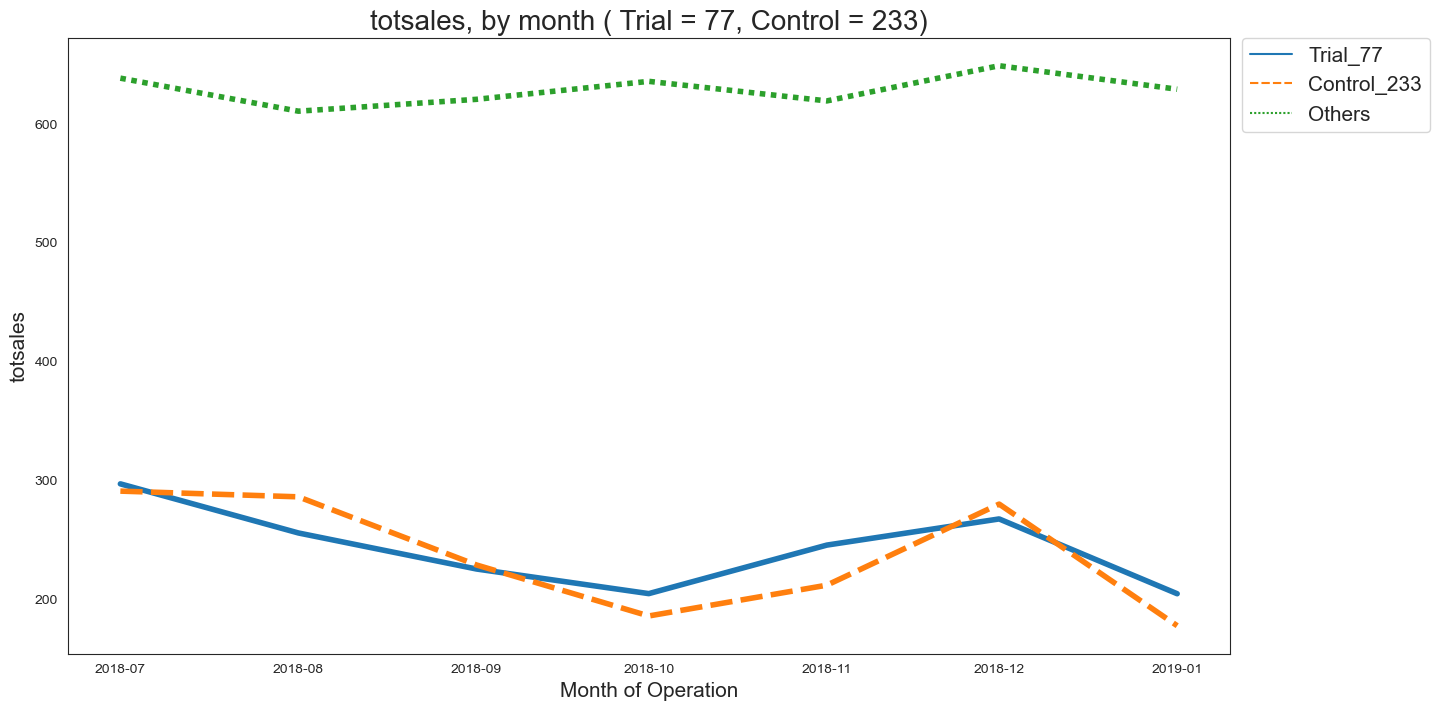

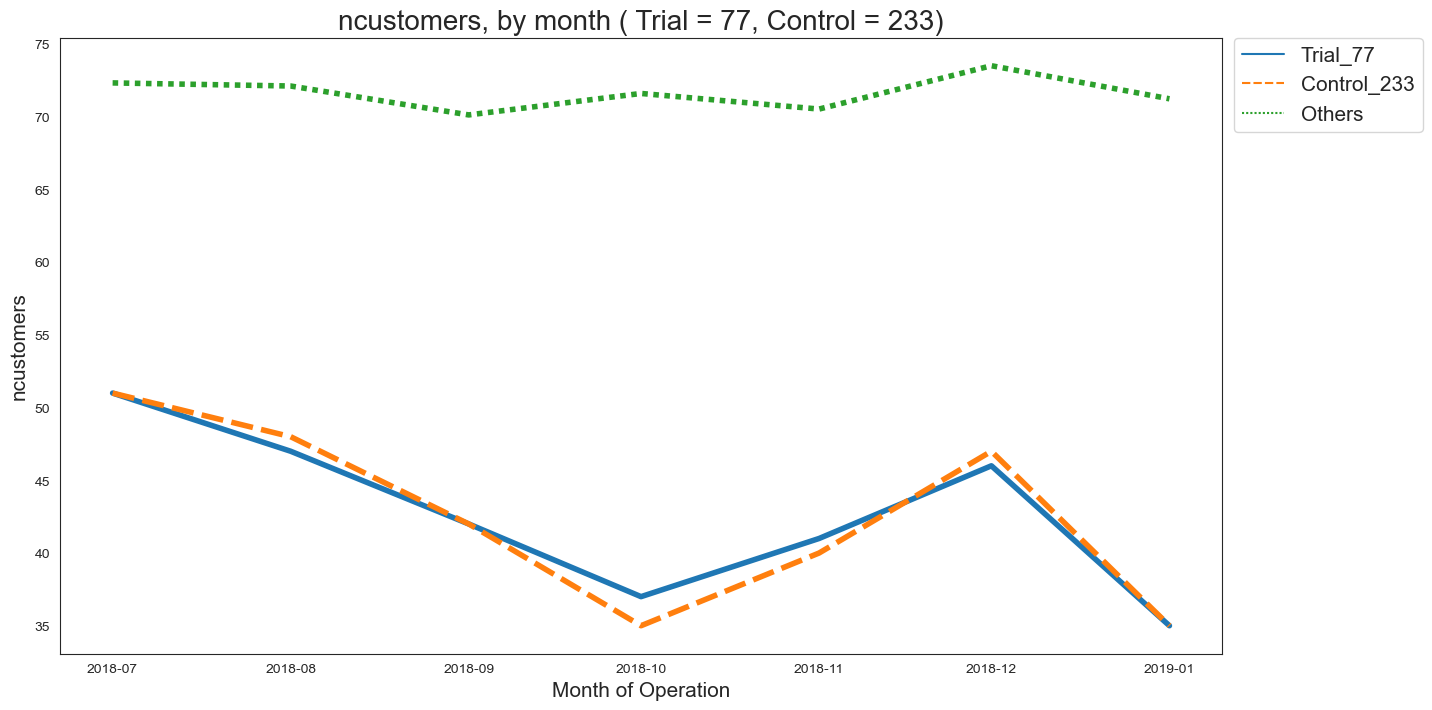

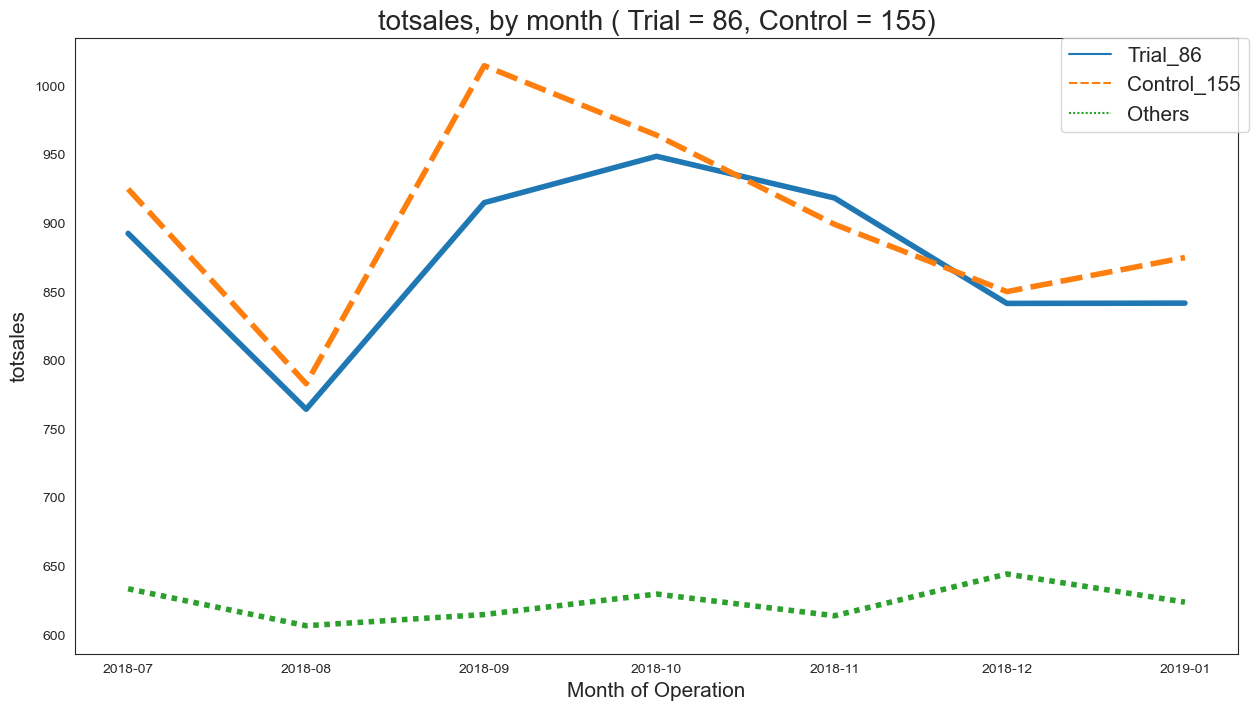

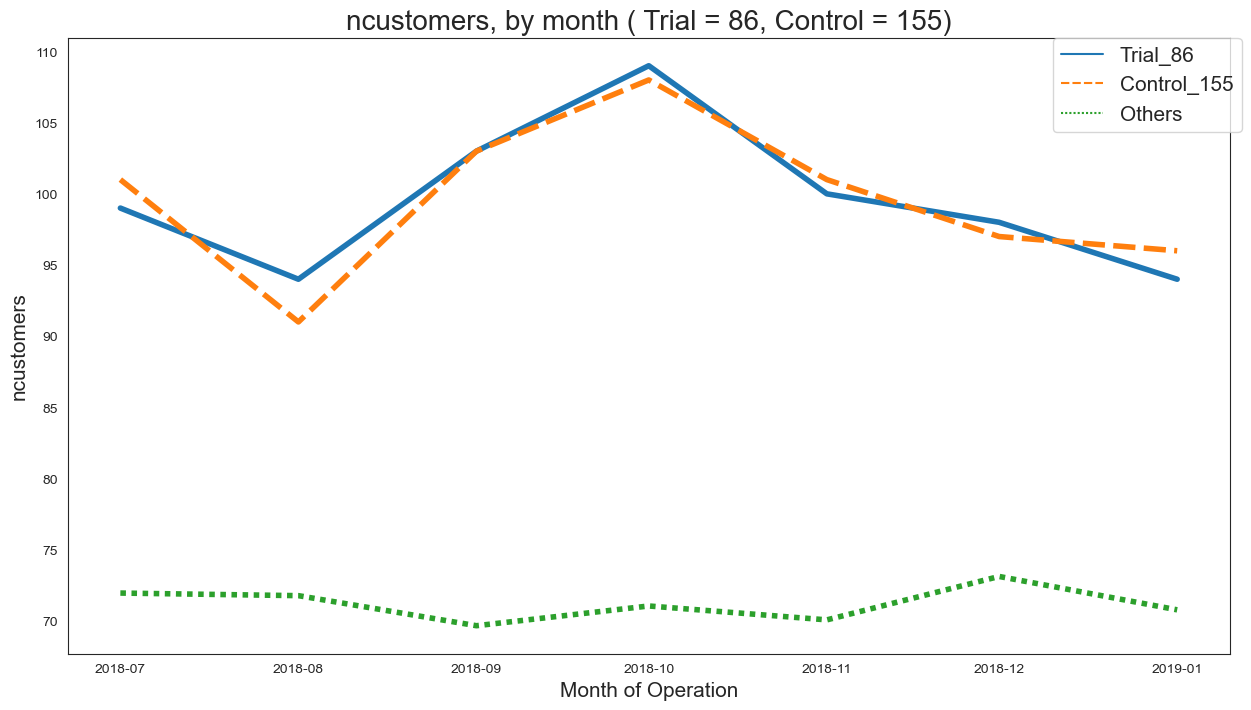

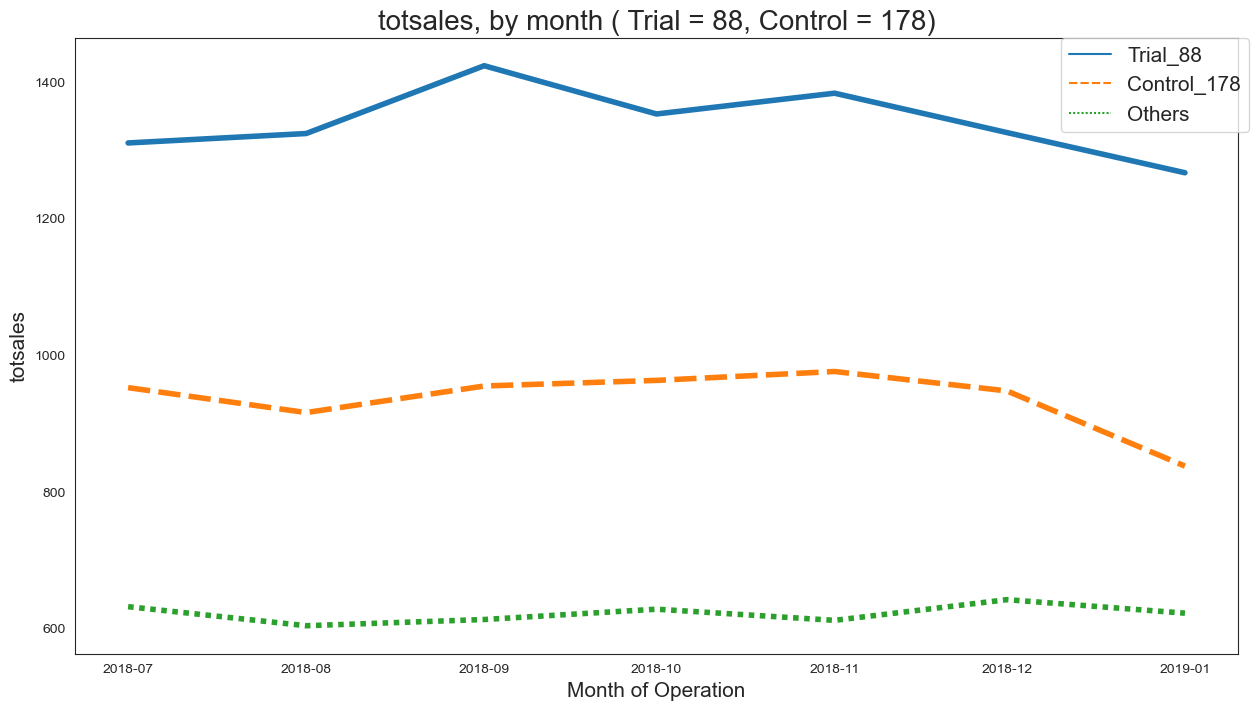

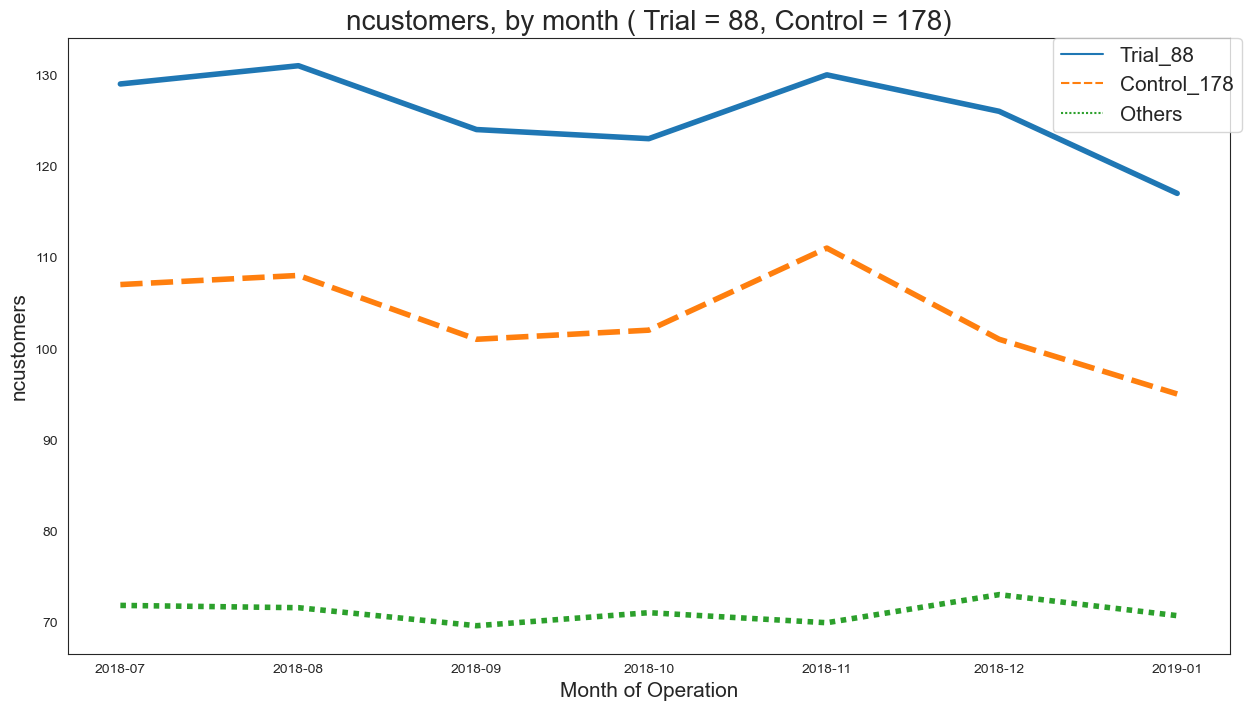

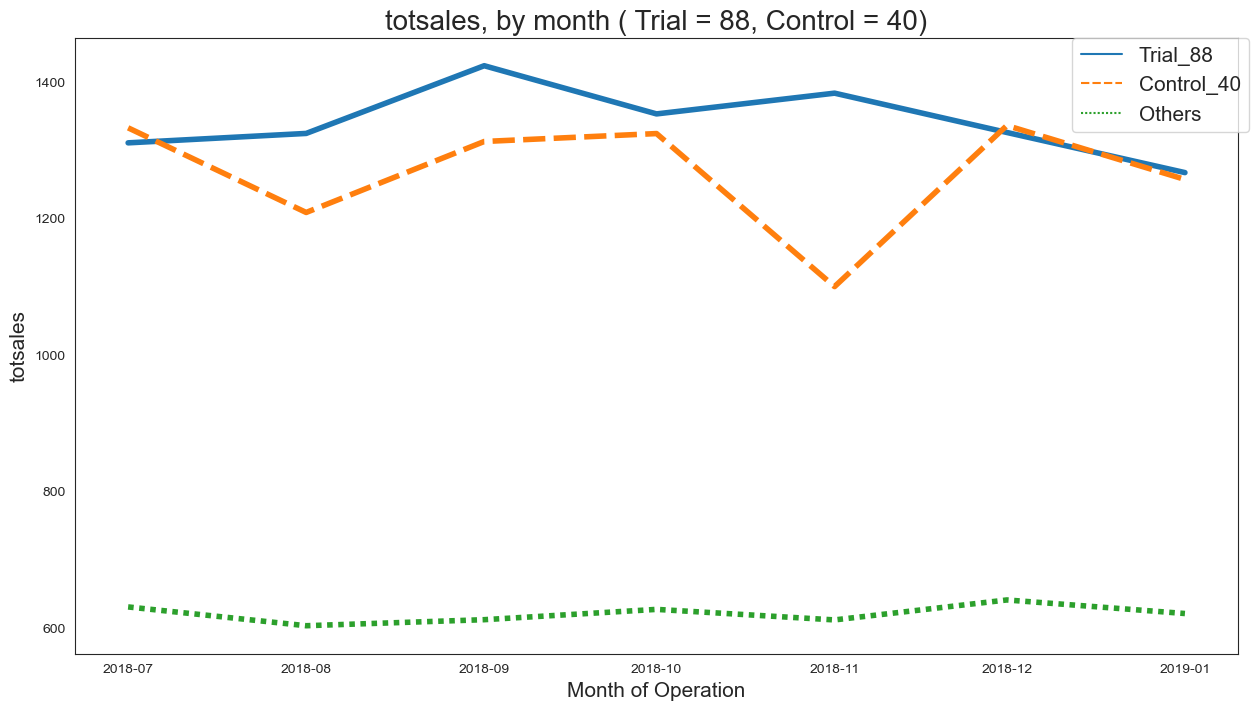

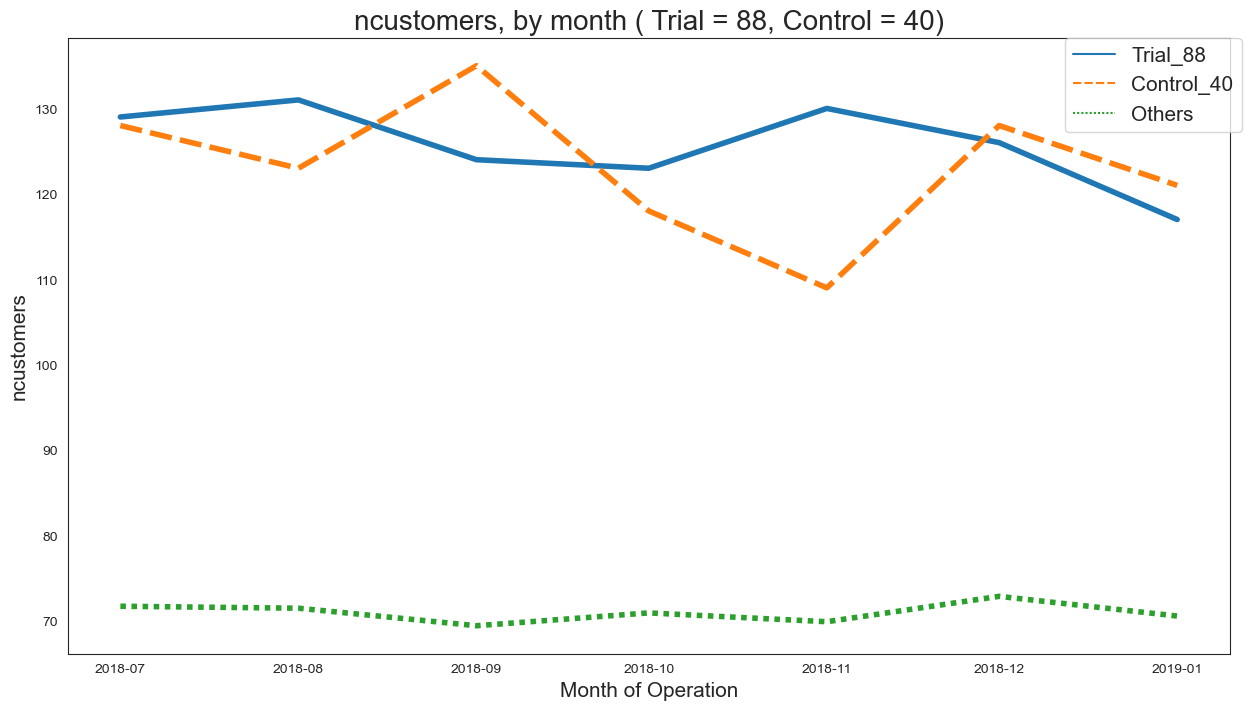

In [428]:
storepair = [[77, 233], [86, 155], [88, 178]]#???method wrong?
metric_col = ['totsales', 'ncustomers']
for pair in storepair:
    for metric in metric_col:
        make_plots(pair, metric)

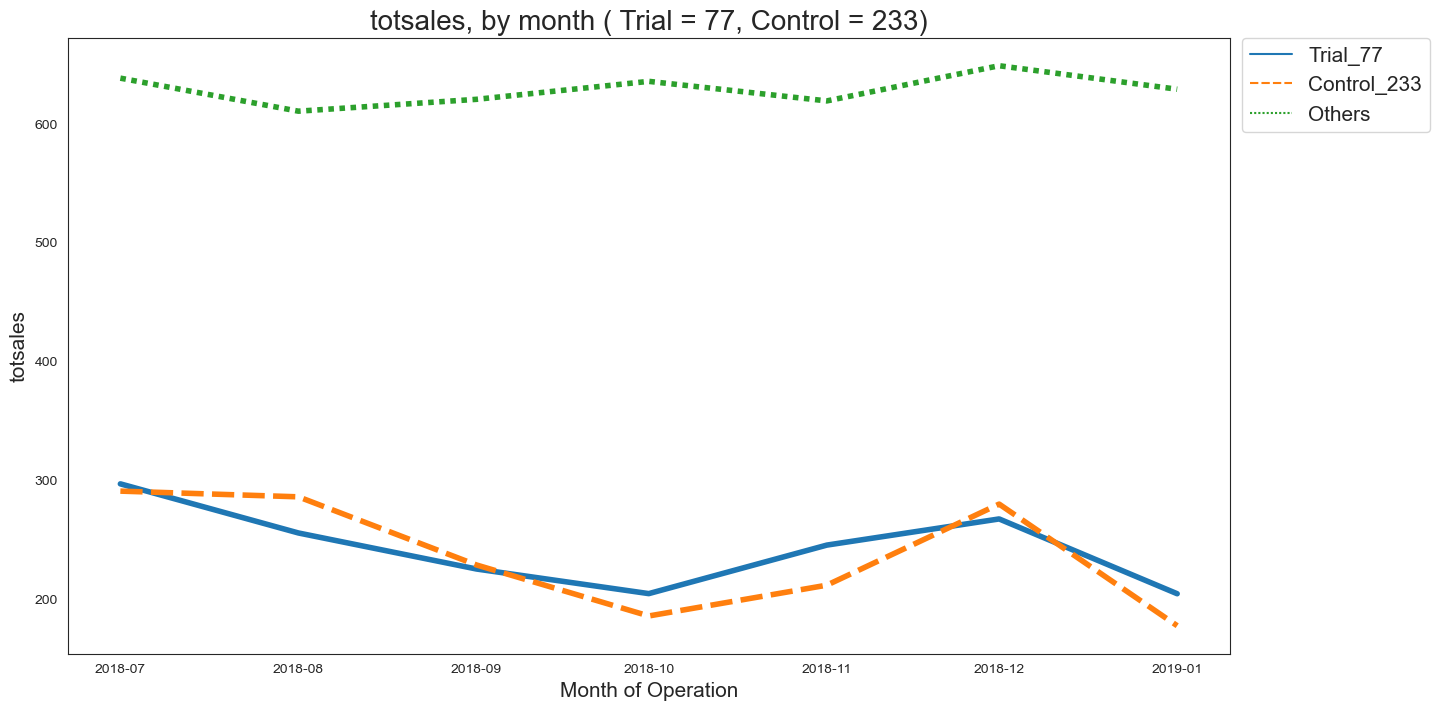

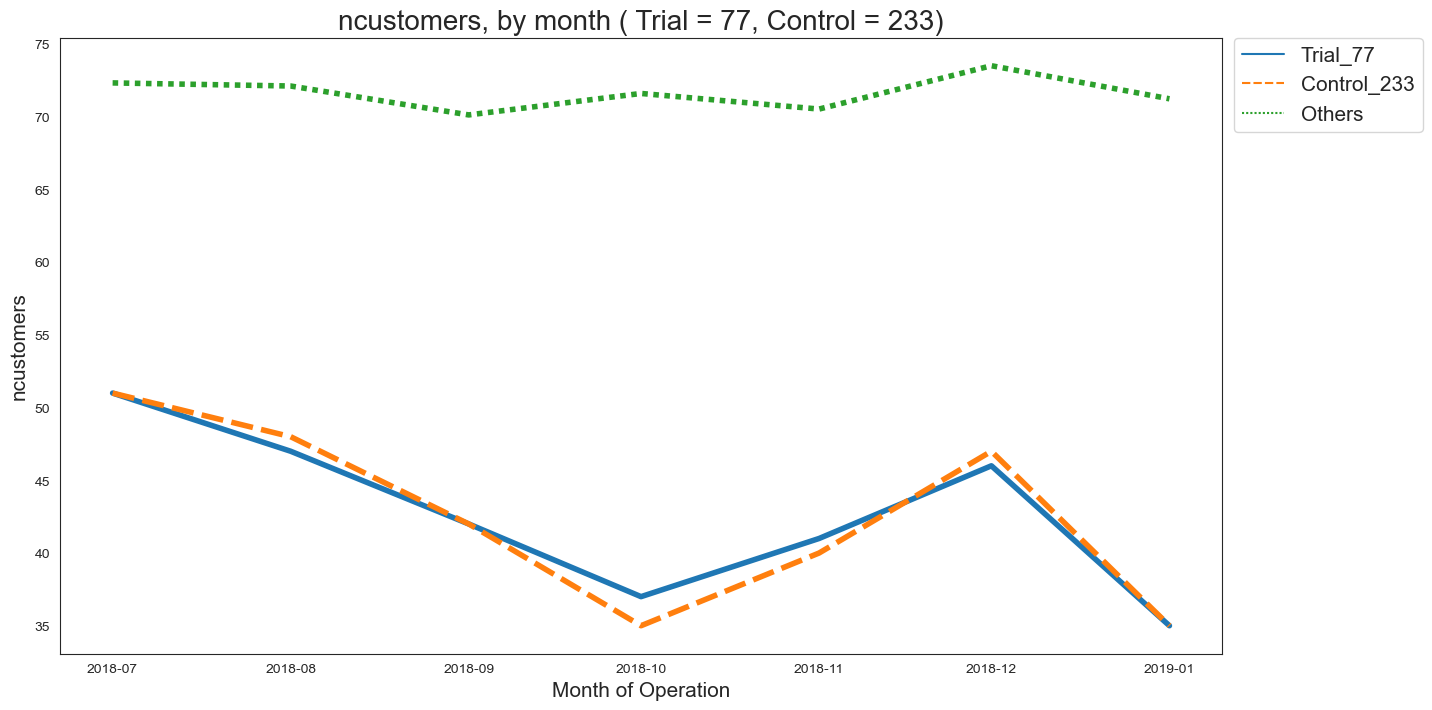

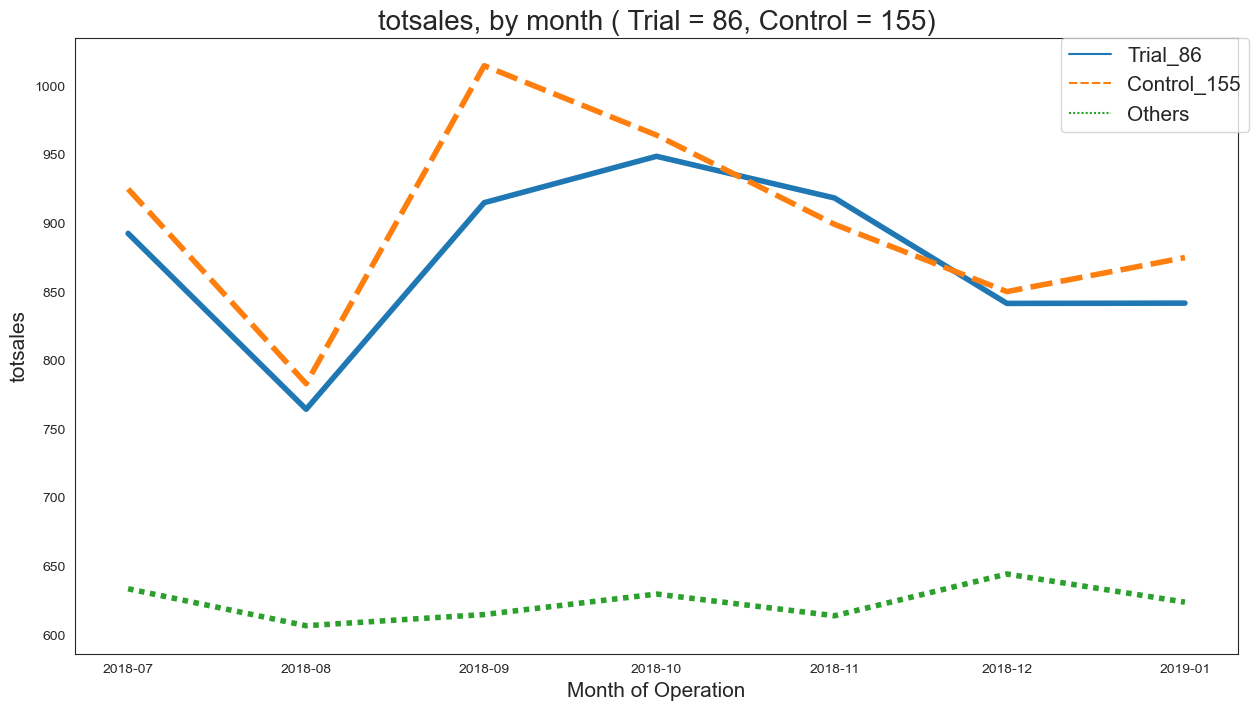

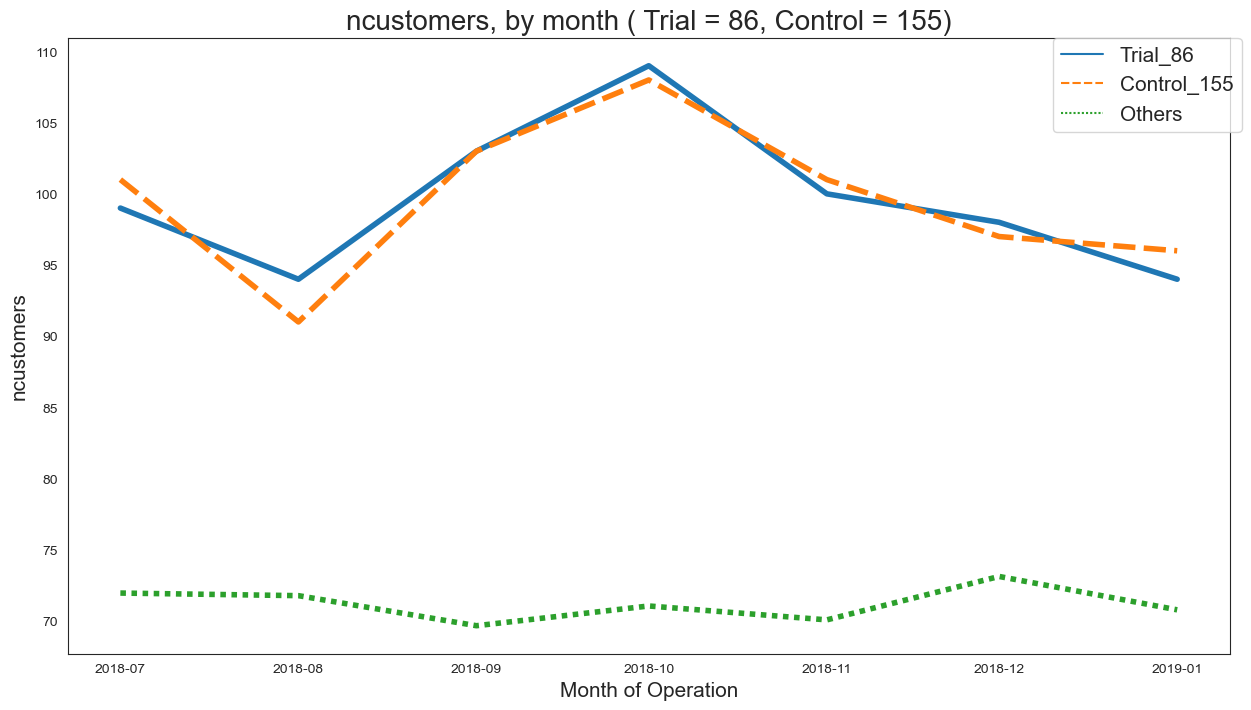

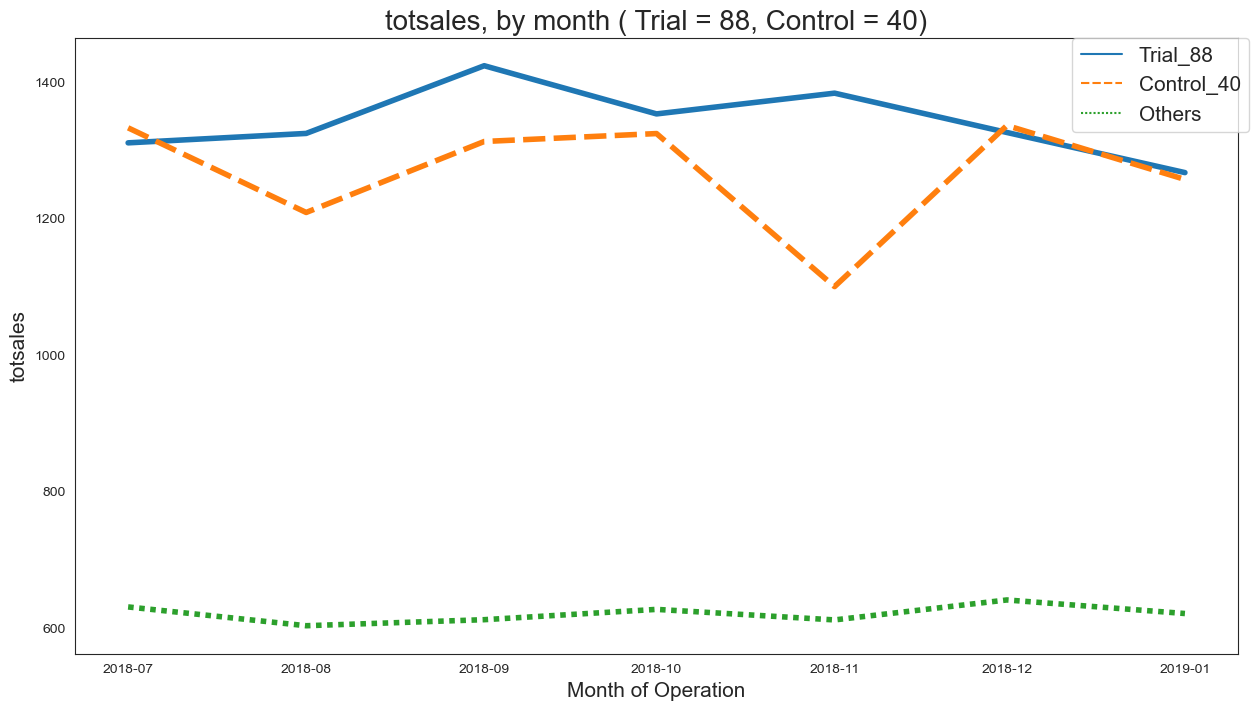

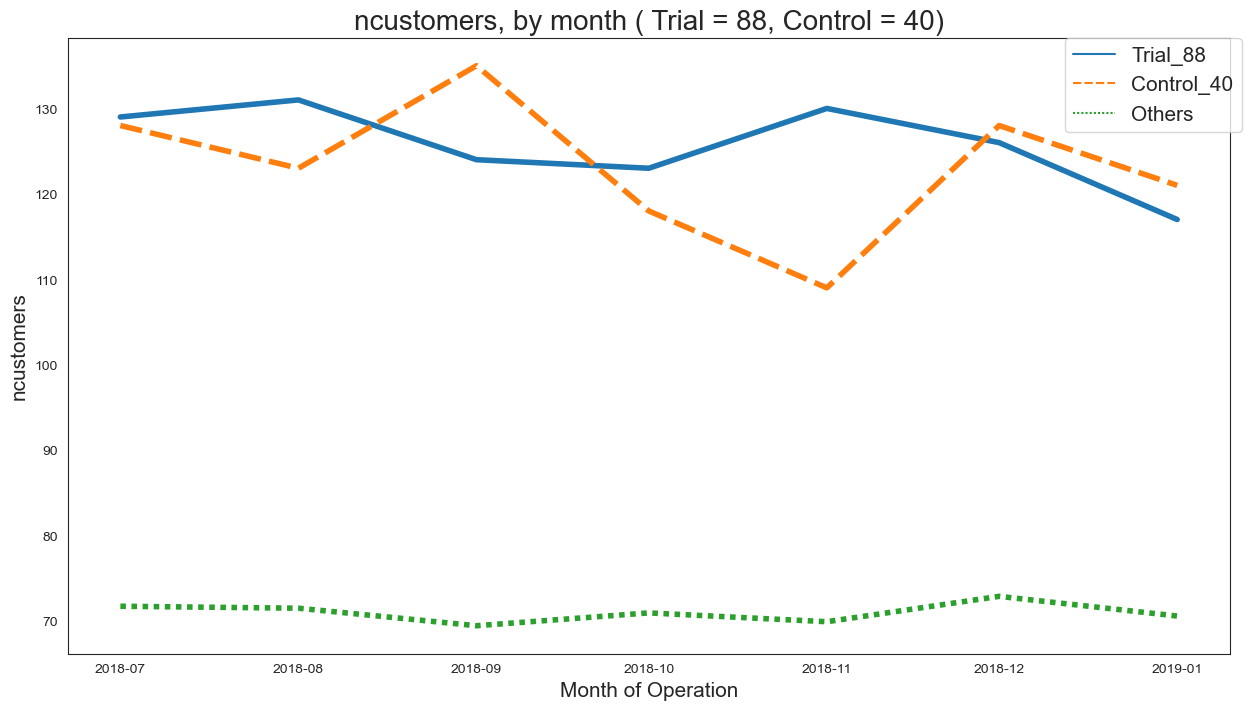

In [448]:
storepair = [[77, 233], [86, 155], [88, 40]]#monthly, 40 better than 178
metric_col = ['totsales', 'ncustomers']
for pair in storepair:
    for metric in metric_col:
        make_plots(pair, metric)

## 3. Assessment of trial
Now that we have comparable sales figures for the control store, we can calculate  the percentage difference between the scaled control sales and the trial store's  sales during the trial period.

In [561]:
# Calculate the scaling factor for the store pairs
scale_store77 = preTrialMeasures[preTrialMeasures.STORE_NBR == 77]['totsales'].sum()/preTrialMeasures[preTrialMeasures.STORE_NBR == 233]['totsales'].sum()
scale_store86 = preTrialMeasures[preTrialMeasures.STORE_NBR == 86]['totsales'].sum()/preTrialMeasures[preTrialMeasures.STORE_NBR == 155]['totsales'].sum()
scale_store88 = preTrialMeasures[preTrialMeasures.STORE_NBR == 88]['totsales'].sum()/preTrialMeasures[preTrialMeasures.STORE_NBR == 237]['totsales'].sum()

In [450]:
scale_store77

1.023617303289553

### 3.1 Total sales

In [470]:
list(scaledControlSales_77["totsales"] * scale_store77)

[297.56555006627303,
 292.6521870104832,
 233.99891553199183,
 190.08573322087,
 216.5974213760694,
 286.40812146041696,
 181.69207133389565,
 249.76262200265094,
 203.80220508495,
 162.34570430172312,
 352.53379925292205,
 226.21942402699122]

#### 3.1.1 store 77

In [480]:
scaledControlSales_77 = measureOverTime[measureOverTime["STORE_NBR"]== 233]
scaledControlSales_77["controlSales"] = scaledControlSales_77["totsales"] * scale_store77
scaledControlSales_77

/var/folders/v5/gvtktlb51r30qx4hnx5gq5b80000gn/T/ipykernel_94502/821530958.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaledControlSales_77["controlSales"] = scaledControlSales_77["totsales"] * scale_store77


,STORE_NBR,YEAR_MONTH,totsales,ncustomers,nTxnPerCust,nChipsPerTxn,avgPriceUnit,controlSales
2699,233,201807,290.7,51,1.058824,1.725490,3.303409,297.565550
2700,233,201808,285.9,48,1.041667,1.666667,3.573750,292.652187
2701,233,201809,228.6,42,1.071429,1.666667,3.265714,233.998916
2702,233,201810,185.7,35,1.028571,1.600000,3.316071,190.085733
2703,233,201811,211.6,40,1.025000,1.550000,3.412903,216.597421
2704,233,201812,279.8,47,1.063830,1.595745,3.730667,286.408121
2705,233,201901,177.5,35,1.000000,1.342857,3.776596,181.692071
2706,233,201902,244.0,45,1.044444,1.555556,3.485714,249.762622
2707,233,201903,199.1,40,1.025000,1.475000,3.374576,203.802205
2708,233,201904,158.6,30,1.066667,1.533333,3.447826,162.345704


In [481]:
# Calculate the percentage difference between scaled control sales and trial sales
trialSales_77 = measureOverTime[measureOverTime["STORE_NBR"]== 77].reset_index(drop=True)
scaledControlSales_77 = scaledControlSales_77.reset_index(drop=True)
percentageDiff_77_s = pd.concat([trialSales_77["YEAR_MONTH"],trialSales_77["totsales"],scaledControlSales_77["controlSales"]],axis=1)
percentageDiff_77_s.columns=["YEAR_MONTH","trialSales","controlSales"]
percentageDiff_77_s["percentageDiff"]= (abs(percentageDiff_77_s["trialSales"]-percentageDiff_77_s["controlSales"]))/percentageDiff_77_s["controlSales"]
percentageDiff_77_s

,YEAR_MONTH,trialSales,controlSales,percentageDiff
0,201807,296.8,297.565550,0.002573
1,201808,255.5,292.652187,0.126950
2,201809,225.2,233.998916,0.037602
3,201810,204.5,190.085733,0.075830
4,201811,245.3,216.597421,0.132516
5,201812,267.3,286.408121,0.066716
6,201901,204.4,181.692071,0.124980
7,201902,235.0,249.762622,0.059107
8,201903,278.5,203.802205,0.366521
9,201904,263.5,162.345704,0.623080


Let's see if the difference is significant! As our null hypothesis is that the trial period is the same as the pre-trial period, let's take the standard deviation based on the scaled percentage difference in the pre-trial period

In [483]:
# Note that there are 8 months in the pre-trial period, hence 8 - 1 = 7 degrees of freedom
dof = 7

# standard deviation of percentage difference in pre-trail period
stdDev_77_s = percentageDiff_77_s[percentageDiff_77_s["YEAR_MONTH"]<201902]["percentageDiff"].std()
stdDev_77_s

0.04994076264142537

We will test with a null hypothesis of there being 0 difference between trial and control stores.

In [484]:
# Calculate the t-values for the trial months. 
percentageDiff_77_s["tValue"] = (percentageDiff_77_s["percentageDiff"]-0)/stdDev_77_s
percentageDiff_77_s

,YEAR_MONTH,trialSales,controlSales,percentageDiff,tValue
0,201807,296.8,297.565550,0.002573,0.051515
1,201808,255.5,292.652187,0.126950,2.542011
2,201809,225.2,233.998916,0.037602,0.752940
3,201810,204.5,190.085733,0.075830,1.518406
4,201811,245.3,216.597421,0.132516,2.653459
5,201812,267.3,286.408121,0.066716,1.335911
6,201901,204.4,181.692071,0.124980,2.502571
7,201902,235.0,249.762622,0.059107,1.183534
8,201903,278.5,203.802205,0.366521,7.339116
9,201904,263.5,162.345704,0.623080,12.476373


In [485]:
# Critical value under 95% confidence & degree of freedom = 7
from scipy.stats import t
t.ppf(0.975,dof) # two-tail

2.3646242510102993

We can observe that the t-value is much larger than the 95th percentile value of the t-distribution for March and April - i.e. the increase in sales in the trial store in March and April is statistically greater than in the control store.



Let's create a more visual version of this by plotting the sales of the control store, the sales of the trial stores and the 95th percentile value of sales of the control store.

In [487]:
# Create new variables Store_type, totSales and TransactionMonth in the data table 
# Create a new column "Store_Type"
measureOverTimeSales_77 = measureOverTime
pastSales_77 = measureOverTimeSales_77
trial_store = 77
control_store = 233
store_type = []
for i in pastSales_77["STORE_NBR"]:
    if i == trial_store:
        store_type.append("Trial")
    elif i == control_store:
        store_type.append("Control")
    else:
        store_type.append("Other Stores")
pastSales_77["Store_type"] = store_type

# Create a new column 'TransactionMonth'
pastSales_77["TransactionMonth"] = pd.to_datetime(pastSales_77["YEAR_MONTH"], format = "%Y%m")

# select Trial and control store
pastSales_77 = pastSales_77.loc[pastSales_77["Store_type"].isin(["Control","Trial"])]
pastSales_77 = pastSales_77.loc[:,["TransactionMonth", "Store_type","totsales"]]
pastSales_77

,TransactionMonth,Store_type,totsales
880,2018-07-01,Trial,296.8
881,2018-08-01,Trial,255.5
882,2018-09-01,Trial,225.2
883,2018-10-01,Trial,204.5
884,2018-11-01,Trial,245.3
885,2018-12-01,Trial,267.3
886,2019-01-01,Trial,204.4
887,2019-02-01,Trial,235.0
888,2019-03-01,Trial,278.5
889,2019-04-01,Trial,263.5


In [488]:
# Control store 95th percentile
pastSales_Controls95_77 = pastSales_77[pastSales_77["Store_type"] == "Control"]
pastSales_Controls95_77["totsales"] = pastSales_Controls95_77["totsales"] * (1+(stdDev_77_s*2))
pastSales_Controls95_77["Store_type"] = "Control 95th % confidence interval"
pastSales_Controls95_77 = pastSales_Controls95_77.loc[:,["TransactionMonth", "Store_type","totsales"]]
pastSales_Controls95_77.head()

/var/folders/v5/gvtktlb51r30qx4hnx5gq5b80000gn/T/ipykernel_94502/2031799026.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pastSales_Controls95_77["totsales"] = pastSales_Controls95_77["totsales"] * (1+(stdDev_77_s*2))
/var/folders/v5/gvtktlb51r30qx4hnx5gq5b80000gn/T/ipykernel_94502/2031799026.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pastSales_Controls95_77["Store_type"] = "Control 95th % confidence interval"


,TransactionMonth,Store_type,totsales
2699,2018-07-01,Control 95th % confidence interval,319.735559
2700,2018-08-01,Control 95th % confidence interval,314.456128
2701,2018-09-01,Control 95th % confidence interval,251.432917
2702,2018-10-01,Control 95th % confidence interval,204.247999
2703,2018-11-01,Control 95th % confidence interval,232.734931


In [489]:
# Control store 5th percentile
pastSales_Controls5_77 = pastSales_77[pastSales_77["Store_type"] == "Control"]
pastSales_Controls5_77["totsales"] = pastSales_Controls95_77["totsales"] * (1-(stdDev_77_s*2))
pastSales_Controls5_77["Store_type"] = "Control 5th % confidence interval"
pastSales_Controls5_77 = pastSales_Controls5_77.loc[:,["TransactionMonth", "Store_type","totsales"]]
pastSales_Controls5_77.head()

/var/folders/v5/gvtktlb51r30qx4hnx5gq5b80000gn/T/ipykernel_94502/2272063289.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pastSales_Controls5_77["totsales"] = pastSales_Controls95_77["totsales"] * (1-(stdDev_77_s*2))
/var/folders/v5/gvtktlb51r30qx4hnx5gq5b80000gn/T/ipykernel_94502/2272063289.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pastSales_Controls5_77["Store_type"] = "Control 5th % confidence interval"


,TransactionMonth,Store_type,totsales
2699,2018-07-01,Control 5th % confidence interval,287.799884
2700,2018-08-01,Control 5th % confidence interval,283.047770
2701,2018-09-01,Control 5th % confidence interval,226.319413
2702,2018-10-01,Control 5th % confidence interval,183.847398
2703,2018-11-01,Control 5th % confidence interval,209.489011


In [490]:
# Merge 3 tables above together
trialAssessment_77_s = pd.concat([pastSales_77, pastSales_Controls95_77, pastSales_Controls5_77])
trialAssessment_77_s

,TransactionMonth,Store_type,totsales
880,2018-07-01,Trial,296.800000
881,2018-08-01,Trial,255.500000
882,2018-09-01,Trial,225.200000
883,2018-10-01,Trial,204.500000
884,2018-11-01,Trial,245.300000
885,2018-12-01,Trial,267.300000
886,2019-01-01,Trial,204.400000
887,2019-02-01,Trial,235.000000
888,2019-03-01,Trial,278.500000
889,2019-04-01,Trial,263.500000


In [491]:
# Plotting these in one nice graph
# Dataset for barplot
bar_77_s = trialAssessment_77_s
bar_77_s["TransactionMonth"] = bar_77_s["TransactionMonth"].dt.strftime("%Y-%m").astype("str")
bar_77_s = bar_77_s.set_index("TransactionMonth")
bar_77_s = bar_77_s.iloc[:24,:]
bar_77_s

,Store_type,totsales
TransactionMonth,,
2018-07,Trial,296.8
2018-08,Trial,255.5
2018-09,Trial,225.2
2018-10,Trial,204.5
2018-11,Trial,245.3
2018-12,Trial,267.3
2019-01,Trial,204.4
2019-02,Trial,235.0
2019-03,Trial,278.5


In [493]:
# Dataset for lineplot
line_77_s = trialAssessment_77_s.set_index(["TransactionMonth","Store_type"])["totsales"].unstack()
line_77_s = line_77_s.iloc[:,[1,2]]
line_77_s

Store_type,Control 5th % confidence interval,Control 95th % confidence interval
TransactionMonth,,
2018-07,287.799884,319.735559
2018-08,283.047770,314.456128
2018-09,226.319413,251.432917
2018-10,183.847398,204.247999
2018-11,209.489011,232.734931
2018-12,277.008626,307.746851
2019-01,175.729203,195.228971
2019-02,241.565778,268.371092
2019-03,197.113715,218.986412


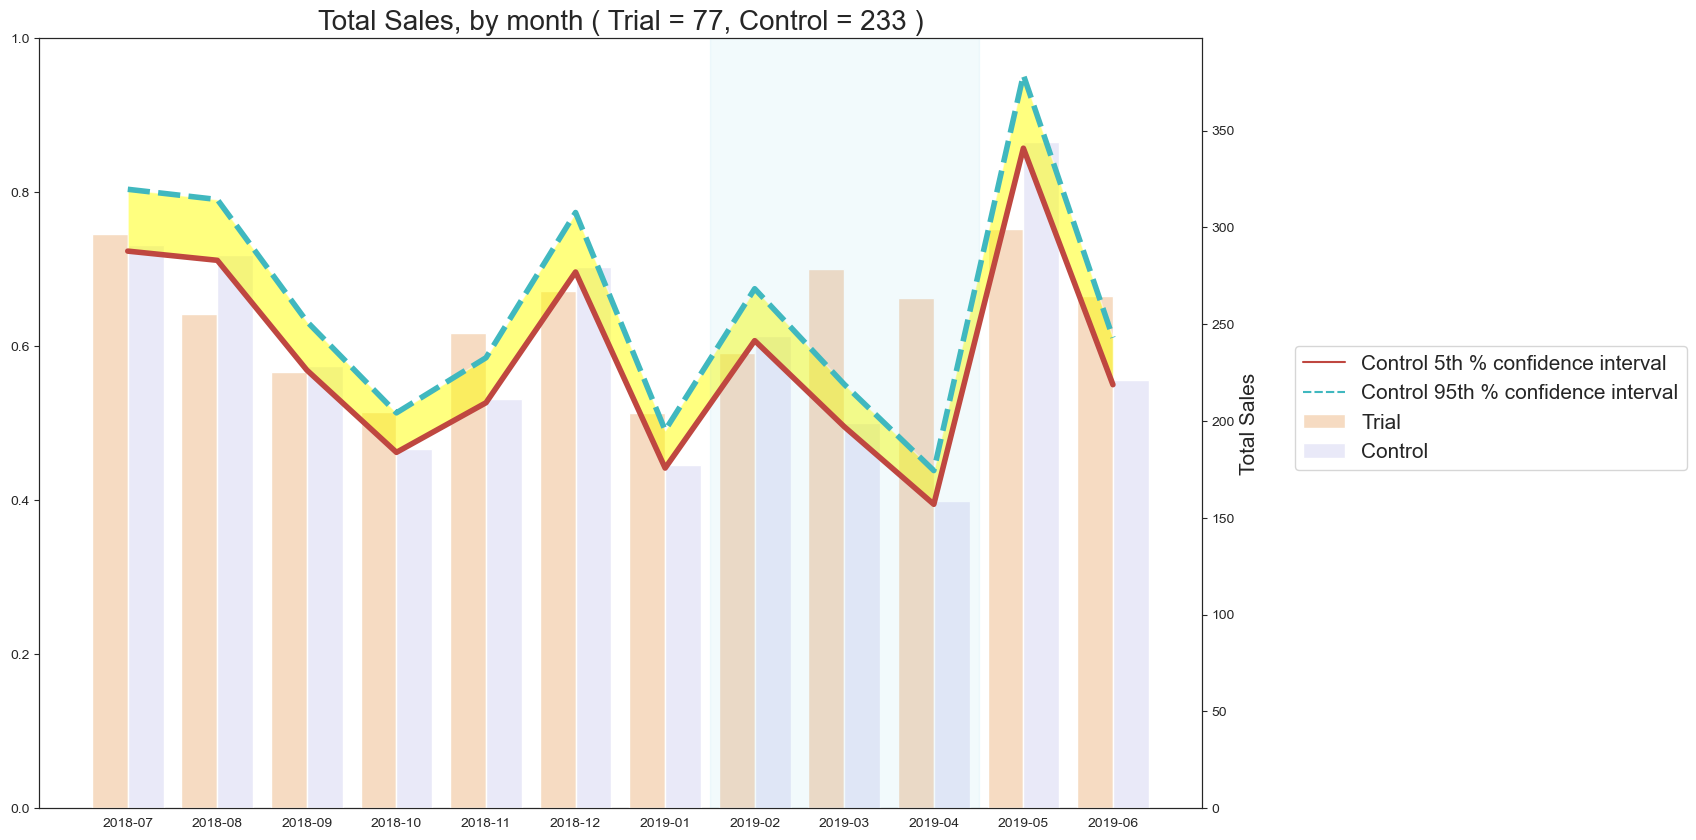

In [495]:
# Plotting
fig, ax1 = plt.subplots(1, 1, figsize=(15,10))
ax2 = ax1.twinx()
ax1 = sns.barplot(x=bar_77_s.index, y=bar_77_s["totsales"], hue=bar_77_s["Store_type"], data=bar_77_s,
                 palette=["peachpuff","lavender"])
ax2 = sns.lineplot(data=line_77_s, linewidth=4, palette=sns.hls_palette(2, l=.5, s=.5))
# Yellow shadow to show values between 5% and 95% confidence 
ax2.fill_between(line_77_s.index, 
                 line_77_s["Control 5th % confidence interval"], line_77_s["Control 95th % confidence interval"], 
                 facecolor="yellow", alpha=0.5)
# blue shadow to show trial period
plt.axvspan(xmin=6.5, xmax=9.5, color = 'skyblue', alpha = 0.1)
plt.title("Total Sales, by month ( Trial = 77, Control = 233 )",fontsize=20)
plt.xlabel("Month of Operation",fontsize=15)
plt.ylabel("Total Sales", fontsize=15)
plt.legend(fontsize=15, bbox_to_anchor=(1.08,0.6),borderaxespad = 0.)

The results show that the trial in store 77 is significantly different to its control store in the trial period as the trial store performance lies outside far from the 5% to 95% confidence interval of the control store in two of the three trial months.



#### 3.1.2 store 86

In [499]:
scaledControlSales_86 = measureOverTime[measureOverTime["STORE_NBR"]== 155]
scaledControlSales_86["controlSales"] = scaledControlSales_86["totsales"] * scale_store86
scaledControlSales_86

/var/folders/v5/gvtktlb51r30qx4hnx5gq5b80000gn/T/ipykernel_94502/2285252495.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaledControlSales_86["controlSales"] = scaledControlSales_86["totsales"] * scale_store86


,STORE_NBR,YEAR_MONTH,totsales,ncustomers,nTxnPerCust,nChipsPerTxn,avgPriceUnit,Store_type,TransactionMonth,controlSales
1793,155,201807,924.60,101,1.217822,2.475248,3.698400,Other Stores,2018-07-01,896.922236
1794,155,201808,782.70,91,1.307692,2.516484,3.417904,Other Stores,2018-08-01,759.269991
1795,155,201809,1014.40,103,1.398058,2.815534,3.497931,Other Stores,2018-09-01,984.034086
1796,155,201810,963.80,108,1.259259,2.518519,3.543382,Other Stores,2018-10-01,934.948790
1797,155,201811,898.80,101,1.316832,2.673267,3.328889,Other Stores,2018-11-01,871.894555
1798,155,201812,849.80,97,1.237113,2.494845,3.511570,Other Stores,2018-12-01,824.361363
1799,155,201901,874.60,96,1.302083,2.625000,3.470635,Other Stores,2019-01-01,848.418979
1800,155,201902,891.20,95,1.315789,2.673684,3.508661,Other Stores,2019-02-01,864.522060
1801,155,201903,804.40,94,1.255319,2.553191,3.351667,Other Stores,2019-03-01,780.320405
1802,155,201904,844.60,99,1.212121,2.444444,3.490083,Other Stores,2019-04-01,819.317024


In [500]:
# Calculate the percentage difference between scaled control sales and trial sales
trialSales_86 = measureOverTime[measureOverTime["STORE_NBR"]== 86].reset_index(drop=True)
scaledControlSales_86 = scaledControlSales_86.reset_index(drop=True)
percentageDiff_86_s = pd.concat([trialSales_86["YEAR_MONTH"],trialSales_86["totsales"],scaledControlSales_86["controlSales"]],axis=1)
percentageDiff_86_s.columns=["YEAR_MONTH","trialSales","controlSales"]
percentageDiff_86_s["percentageDiff"]= (abs(percentageDiff_86_s["trialSales"]-percentageDiff_86_s["controlSales"]))/percentageDiff_86_s["controlSales"]
percentageDiff_86_s

,YEAR_MONTH,trialSales,controlSales,percentageDiff
0,201807,892.20,896.922236,0.005265
1,201808,764.05,759.269991,0.006296
2,201809,914.60,984.034086,0.070561
3,201810,948.40,934.948790,0.014387
4,201811,918.00,871.894555,0.052880
5,201812,841.20,824.361363,0.020426
6,201901,841.40,848.418979,0.008273
7,201902,913.20,864.522060,0.056306
8,201903,1026.80,780.320405,0.315870
9,201904,848.20,819.317024,0.035253


In [505]:
# Note that there are 8 months in the pre-trial period, hence 8 - 1 = 7 degrees of freedom
dof = 7

# standard deviation of percentage difference in pre-trail period
stdDev_86_s = percentageDiff_86_s[percentageDiff_86_s["YEAR_MONTH"]<201902]["percentageDiff"].std()
stdDev_86_s

0.025833952854772368

In [506]:
# Calculate the t-values for the trial months. 
percentageDiff_86_s["tValue"] = (percentageDiff_86_s["percentageDiff"]-0)/stdDev_86_s
percentageDiff_86_s

,YEAR_MONTH,trialSales,controlSales,percentageDiff,tValue
0,201807,892.20,896.922236,0.005265,0.203799
1,201808,764.05,759.269991,0.006296,0.243692
2,201809,914.60,984.034086,0.070561,2.731315
3,201810,948.40,934.948790,0.014387,0.556907
4,201811,918.00,871.894555,0.052880,2.046904
5,201812,841.20,824.361363,0.020426,0.790676
6,201901,841.40,848.418979,0.008273,0.320238
7,201902,913.20,864.522060,0.056306,2.179542
8,201903,1026.80,780.320405,0.315870,12.226922
9,201904,848.20,819.317024,0.035253,1.364580


In [509]:
# Create new variables Store_type, totSales and TransactionMonth in the data table 
# Create a new column "Store_Type"
measureOverTimeSales_86 = measureOverTime
pastSales_86 = measureOverTimeSales_86
trial_store = 86
control_store = 155
store_type = []
for i in pastSales_86["STORE_NBR"]:
    if i == trial_store:
        store_type.append("Trial")
    elif i == control_store:
        store_type.append("Control")
    else:
        store_type.append("Other Stores")
pastSales_86["Store_type"] = store_type

# Create a new column 'TransactionMonth'
pastSales_86["TransactionMonth"] = pd.to_datetime(pastSales_86["YEAR_MONTH"], format = "%Y%m")

# select Trial and control store
pastSales_86 = pastSales_86.loc[pastSales_86["Store_type"].isin(["Control","Trial"])]
pastSales_86 = pastSales_86.loc[:,["TransactionMonth", "Store_type","totsales"]]
pastSales_86

,TransactionMonth,Store_type,totsales
977,2018-07-01,Trial,892.20
978,2018-08-01,Trial,764.05
979,2018-09-01,Trial,914.60
980,2018-10-01,Trial,948.40
981,2018-11-01,Trial,918.00
982,2018-12-01,Trial,841.20
983,2019-01-01,Trial,841.40
984,2019-02-01,Trial,913.20
985,2019-03-01,Trial,1026.80
986,2019-04-01,Trial,848.20


In [512]:
# Control store 95th percentile
pastSales_Controls95_86 = pastSales_86[pastSales_86["Store_type"] == "Control"]
pastSales_Controls95_86["totsales"] = pastSales_Controls95_86["totsales"] * (1+(stdDev_86_s*2))
pastSales_Controls95_86["Store_type"] = "Control 95th % confidence interval"
pastSales_Controls95_86 = pastSales_Controls95_86.loc[:,["TransactionMonth", "Store_type","totsales"]]
pastSales_Controls95_86.head()

/var/folders/v5/gvtktlb51r30qx4hnx5gq5b80000gn/T/ipykernel_94502/2888410680.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pastSales_Controls95_86["totsales"] = pastSales_Controls95_86["totsales"] * (1+(stdDev_86_s*2))
/var/folders/v5/gvtktlb51r30qx4hnx5gq5b80000gn/T/ipykernel_94502/2888410680.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pastSales_Controls95_86["Store_type"] = "Control 95th % confidence interval"


,TransactionMonth,Store_type,totsales
1793,2018-07-01,Control 95th % confidence interval,972.372146
1794,2018-08-01,Control 95th % confidence interval,823.140470
1795,2018-09-01,Control 95th % confidence interval,1066.811924
1796,2018-10-01,Control 95th % confidence interval,1013.597528
1797,2018-11-01,Control 95th % confidence interval,945.239114


In [514]:
# Control store 5th percentile
pastSales_Controls5_86 = pastSales_86[pastSales_86["Store_type"] == "Control"]
pastSales_Controls5_86["totsales"] = pastSales_Controls95_86["totsales"] * (1-(stdDev_86_s*2))
pastSales_Controls5_86["Store_type"] = "Control 5th % confidence interval"
pastSales_Controls5_86 = pastSales_Controls5_86.loc[:,["TransactionMonth", "Store_type","totsales"]]
pastSales_Controls5_86.head()

/var/folders/v5/gvtktlb51r30qx4hnx5gq5b80000gn/T/ipykernel_94502/3086928652.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pastSales_Controls5_86["totsales"] = pastSales_Controls95_86["totsales"] * (1-(stdDev_86_s*2))
/var/folders/v5/gvtktlb51r30qx4hnx5gq5b80000gn/T/ipykernel_94502/3086928652.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pastSales_Controls5_86["Store_type"] = "Control 5th % confidence interval"


,TransactionMonth,Store_type,totsales
1793,2018-07-01,Control 5th % confidence interval,922.131713
1794,2018-08-01,Control 5th % confidence interval,780.610526
1795,2018-09-01,Control 5th % confidence interval,1011.691986
1796,2018-10-01,Control 5th % confidence interval,961.227066
1797,2018-11-01,Control 5th % confidence interval,896.400588


In [519]:
# Merge 3 tables above together
trialAssessment_86_s = pd.concat([pastSales_86, pastSales_Controls95_86, pastSales_Controls5_86])
trialAssessment_86_s

,TransactionMonth,Store_type,totsales
977,2018-07-01,Trial,892.200000
978,2018-08-01,Trial,764.050000
979,2018-09-01,Trial,914.600000
980,2018-10-01,Trial,948.400000
981,2018-11-01,Trial,918.000000
982,2018-12-01,Trial,841.200000
983,2019-01-01,Trial,841.400000
984,2019-02-01,Trial,913.200000
985,2019-03-01,Trial,1026.800000
986,2019-04-01,Trial,848.200000


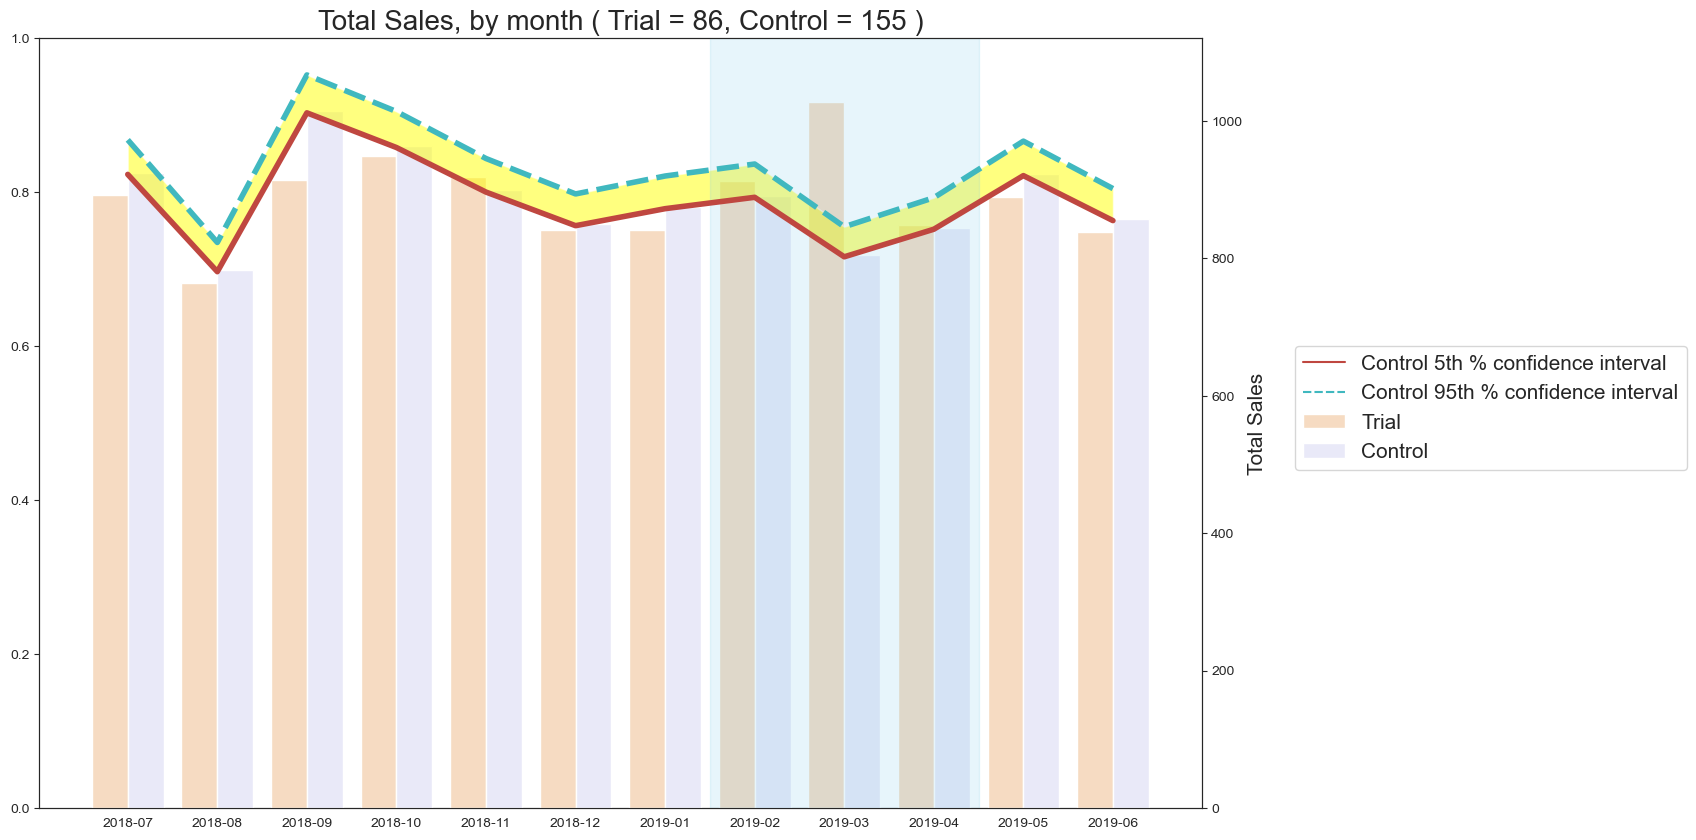

In [520]:
# Plotting these in one nice graph
# Dataset for barplot
bar_86_s = trialAssessment_86_s
bar_86_s["TransactionMonth"] = bar_86_s["TransactionMonth"].dt.strftime("%Y-%m").astype("str")
bar_86_s = bar_86_s.set_index("TransactionMonth")
bar_86_s = bar_86_s.iloc[:24,:]
#bar_86_s

# Dataset for lineplot
line_86_s = trialAssessment_86_s.set_index(["TransactionMonth","Store_type"])["totsales"].unstack()
line_86_s = line_86_s.iloc[:,[1,2]]
line_86_s

# Plotting
fig, ax1 = plt.subplots(1, 1, figsize=(15,10))
ax2 = ax1.twinx()
ax1 = sns.barplot(x=bar_86_s.index, y=bar_86_s["totsales"], hue=bar_86_s["Store_type"], data=bar_86_s,
                 palette=["peachpuff","lavender"])
ax2 = sns.lineplot(data=line_86_s, linewidth=4, palette=sns.hls_palette(2, l=.5, s=.5))
# Yellow shadow to show values between 5% and 95% confidence 
ax2.fill_between(line_86_s.index, 
                 line_86_s["Control 5th % confidence interval"], line_86_s["Control 95th % confidence interval"], 
                 facecolor="yellow", alpha=0.5)
# blue shadow to show trial period
plt.axvspan(xmin=6.5, xmax=9.5, color = 'skyblue', alpha = 0.2)
plt.title("Total Sales, by month ( Trial = 86, Control = 155 )",fontsize=20)
plt.xlabel("Month of Operation",fontsize=15)
plt.ylabel("Total Sales", fontsize=15)
plt.legend(fontsize=15, bbox_to_anchor=(1.08,0.6),borderaxespad = 0.)

The results show that the trial in store 86 is not significantly different to its control store in the trial period as the trial store performance lies inside the 5% to 95% confidence interval of the control store in two of the March.

#### 3.1.3 store 88

In [562]:
scaledControlSales_88 = measureOverTime[measureOverTime["STORE_NBR"]== 237]
scaledControlSales_88["controlSales"] = scaledControlSales_88["totsales"] * scale_store88
scaledControlSales_88

/var/folders/v5/gvtktlb51r30qx4hnx5gq5b80000gn/T/ipykernel_94502/3636486677.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaledControlSales_88["controlSales"] = scaledControlSales_88["totsales"] * scale_store88


,STORE_NBR,YEAR_MONTH,totsales,ncustomers,nTxnPerCust,nChipsPerTxn,avgPriceUnit,Store_type,TransactionMonth,controlSales
2747,237,201807,1448.4,128,1.265625,2.531250,4.470370,Other Stores,2018-07-01,1450.657086
2748,237,201808,1367.8,135,1.222222,2.318519,4.369968,Other Stores,2018-08-01,1369.931485
2749,237,201809,1322.2,126,1.182540,2.373016,4.422074,Other Stores,2018-09-01,1324.260425
2750,237,201810,1348.3,123,1.195122,2.430894,4.509365,Other Stores,2018-10-01,1350.401097
2751,237,201811,1397.6,132,1.219697,2.424242,4.367500,Other Stores,2018-11-01,1399.777923
2752,237,201812,1265.0,124,1.161290,2.330645,4.377163,Other Stores,2018-12-01,1266.971288
2753,237,201901,1219.7,117,1.188034,2.367521,4.403249,Other Stores,2019-01-01,1221.600696
2754,237,201902,1404.8,126,1.246032,2.492063,4.473885,Other Stores,2019-02-01,1406.989143
2755,237,201903,1208.2,119,1.126050,2.302521,4.409489,Other Stores,2019-03-01,1210.082775
2756,237,201904,1204.6,120,1.125000,2.266667,4.428676,Other Stores,2019-04-01,1206.477165


In [563]:
# Calculate the percentage difference between scaled control sales and trial sales
trialSales_88 = measureOverTime[measureOverTime["STORE_NBR"]== 88].reset_index(drop=True)
scaledControlSales_88 = scaledControlSales_88.reset_index(drop=True)
percentageDiff_88_s = pd.concat([trialSales_88["YEAR_MONTH"],trialSales_88["totsales"],scaledControlSales_88["controlSales"]],axis=1)
percentageDiff_88_s.columns=["YEAR_MONTH","trialSales","controlSales"]
percentageDiff_88_s["percentageDiff"]= (abs(percentageDiff_88_s["trialSales"]-percentageDiff_88_s["controlSales"]))/percentageDiff_88_s["controlSales"]
percentageDiff_88_s

,YEAR_MONTH,trialSales,controlSales,percentageDiff
0,201807,1310.00,1450.657086,0.096961
1,201808,1323.80,1369.931485,0.033674
2,201809,1423.00,1324.260425,0.074562
3,201810,1352.40,1350.401097,0.001480
4,201811,1382.80,1399.777923,0.012129
5,201812,1325.20,1266.971288,0.045959
6,201901,1266.40,1221.600696,0.036673
7,201902,1370.20,1406.989143,0.026147
8,201903,1477.20,1210.082775,0.220743
9,201904,1439.40,1206.477165,0.193060


In [564]:
# Note that there are 8 months in the pre-trial period, hence 8 - 1 = 7 degrees of freedom
dof = 7

# standard deviation of percentage difference in pre-trail period
stdDev_88_s = percentageDiff_88_s[percentageDiff_88_s["YEAR_MONTH"]<201902]["percentageDiff"].std()
stdDev_88_s

0.0334678673030788

In [565]:
# Calculate the t-values for the trial months. 
percentageDiff_88_s["tValue"] = (percentageDiff_88_s["percentageDiff"]-0)/stdDev_88_s
percentageDiff_88_s

,YEAR_MONTH,trialSales,controlSales,percentageDiff,tValue
0,201807,1310.00,1450.657086,0.096961,2.897136
1,201808,1323.80,1369.931485,0.033674,1.006168
2,201809,1423.00,1324.260425,0.074562,2.227870
3,201810,1352.40,1350.401097,0.001480,0.044228
4,201811,1382.80,1399.777923,0.012129,0.362408
5,201812,1325.20,1266.971288,0.045959,1.373227
6,201901,1266.40,1221.600696,0.036673,1.095756
7,201902,1370.20,1406.989143,0.026147,0.781270
8,201903,1477.20,1210.082775,0.220743,6.595668
9,201904,1439.40,1206.477165,0.193060,5.768527


In [566]:
# Create new variables Store_type, totSales and TransactionMonth in the data table 
# Create a new column "Store_Type"
measureOverTimeSales_88 = measureOverTime
pastSales_88 = measureOverTimeSales_88
trial_store = 88
control_store = 40
store_type = []
for i in pastSales_88["STORE_NBR"]:
    if i == trial_store:
        store_type.append("Trial")
    elif i == control_store:
        store_type.append("Control")
    else:
        store_type.append("Other Stores")
pastSales_88["Store_type"] = store_type

# Create a new column 'TransactionMonth'
pastSales_88["TransactionMonth"] = pd.to_datetime(pastSales_88["YEAR_MONTH"], format = "%Y%m")

# select Trial and control store
pastSales_88 = pastSales_88.loc[pastSales_88["Store_type"].isin(["Control","Trial"])]
pastSales_88 = pastSales_88.loc[:,["TransactionMonth", "Store_type","totsales"]]
#pastSales_88

In [567]:
# Control store 95th percentile
pastSales_Controls95_88 = pastSales_88[pastSales_88["Store_type"] == "Control"]
pastSales_Controls95_88["totsales"] = pastSales_Controls95_88["totsales"] * (1+(stdDev_88_s*2))
pastSales_Controls95_88["Store_type"] = "Control 95th % confidence interval"
pastSales_Controls95_88 = pastSales_Controls95_88.loc[:,["TransactionMonth", "Store_type","totsales"]]
#pastSales_Controls95_88.head()

/var/folders/v5/gvtktlb51r30qx4hnx5gq5b80000gn/T/ipykernel_94502/2935937298.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pastSales_Controls95_88["totsales"] = pastSales_Controls95_88["totsales"] * (1+(stdDev_88_s*2))
/var/folders/v5/gvtktlb51r30qx4hnx5gq5b80000gn/T/ipykernel_94502/2935937298.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pastSales_Controls95_88["Store_type"] = "Control 95th % confidence interval"


In [568]:
# Control store 5th percentile
pastSales_Controls5_88 = pastSales_88[pastSales_88["Store_type"] == "Control"]
pastSales_Controls5_88["totsales"] = pastSales_Controls95_88["totsales"] * (1-(stdDev_88_s*2))
pastSales_Controls5_88["Store_type"] = "Control 5th % confidence interval"
pastSales_Controls5_88 = pastSales_Controls5_88.loc[:,["TransactionMonth", "Store_type","totsales"]]
#pastSales_Controls5_88.head()

/var/folders/v5/gvtktlb51r30qx4hnx5gq5b80000gn/T/ipykernel_94502/1852607118.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pastSales_Controls5_88["totsales"] = pastSales_Controls95_88["totsales"] * (1-(stdDev_88_s*2))
/var/folders/v5/gvtktlb51r30qx4hnx5gq5b80000gn/T/ipykernel_94502/1852607118.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pastSales_Controls5_88["Store_type"] = "Control 5th % confidence interval"


In [572]:
# Merge 3 tables above together
trialAssessment_88_s = pd.concat([pastSales_88, pastSales_Controls95_88, pastSales_Controls5_88])
trialAssessment_88_s

,TransactionMonth,Store_type,totsales
448,2018-07-01,Control,1332.000000
449,2018-08-01,Control,1208.000000
450,2018-09-01,Control,1312.000000
451,2018-10-01,Control,1323.600000
452,2018-11-01,Control,1099.400000
453,2018-12-01,Control,1335.400000
454,2019-01-01,Control,1256.400000
455,2019-02-01,Control,1355.400000
456,2019-03-01,Control,1277.600000
457,2019-04-01,Control,1249.000000


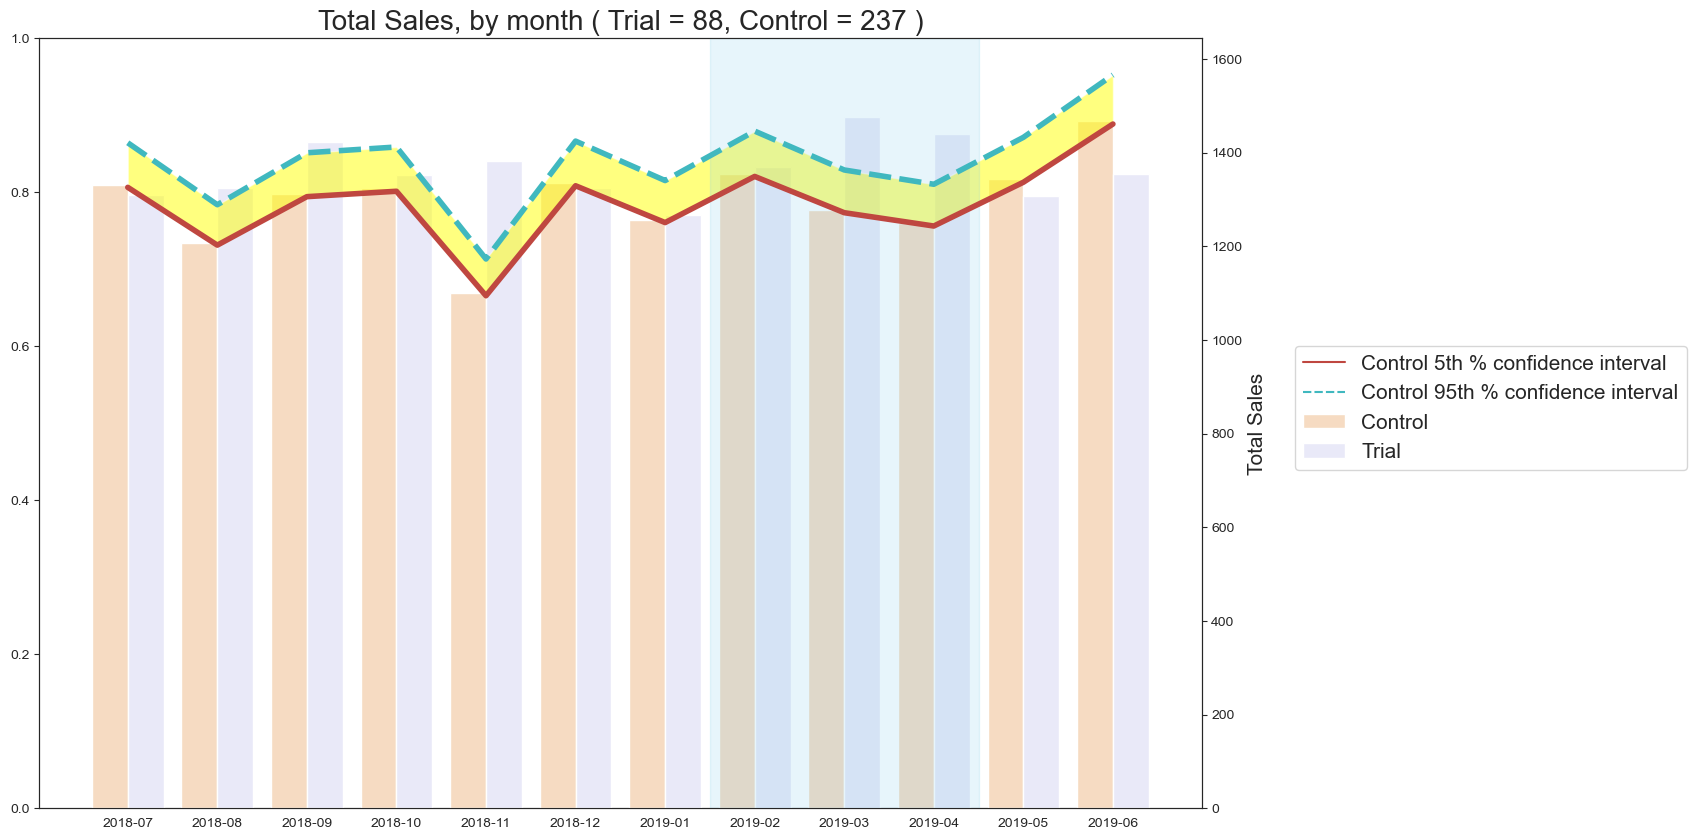

In [573]:
# Plotting these in one nice graph
# Dataset for barplot
bar_88_s = trialAssessment_88_s
bar_88_s["TransactionMonth"] = bar_88_s["TransactionMonth"].dt.strftime("%Y-%m").astype("str")
bar_88_s = bar_88_s.set_index("TransactionMonth")
bar_88_s = bar_88_s.iloc[:24,:]
#bar_88_s

# Dataset for lineplot
line_88_s = trialAssessment_88_s.set_index(["TransactionMonth","Store_type"])["totsales"].unstack()
line_88_s = line_88_s.iloc[:,[1,2]]
line_88_s

# Plotting
fig, ax1 = plt.subplots(1, 1, figsize=(15,10))
ax2 = ax1.twinx()
ax1 = sns.barplot(x=bar_88_s.index, y=bar_88_s["totsales"], hue=bar_88_s["Store_type"], data=bar_88_s,
                 palette=["peachpuff","lavender"])
ax2 = sns.lineplot(data=line_88_s, linewidth=4, palette=sns.hls_palette(2, l=.5, s=.5))
# Yellow shadow to show values between 5% and 95% confidence 
ax2.fill_between(line_88_s.index, 
                 line_88_s["Control 5th % confidence interval"], line_88_s["Control 95th % confidence interval"], 
                 facecolor="yellow", alpha=0.5)
# blue shadow to show trial period
plt.axvspan(xmin=6.5, xmax=9.5, color = 'skyblue', alpha = 0.2)
plt.title("Total Sales, by month ( Trial = 88, Control = 237 )",fontsize=20)
plt.xlabel("Month of Operation",fontsize=15)
plt.ylabel("Total Sales", fontsize=15)
plt.legend(fontsize=15, bbox_to_anchor=(1.08,0.6),borderaxespad = 0.)

The results show that the trial in store 77 is significantly different to its control store in the trial period as the trial store performance lies outside the 5% to 95% confidence interval of the control store in two of the three trial months.

For store 86, we can see that the trial in March is significantly different to the control store with the total sales performance outside of the 5% to 95% confidence interval. However, there is no significant difference in February's and April's performance.

### 3.2 ncustomers

In [536]:
preTrialMeasures.columns

Index(['STORE_NBR', 'YEAR_MONTH', 'totsales', 'ncustomers', 'nTxnPerCust',
       'nChipsPerTxn', 'avgPriceUnit'],
      dtype='object')

In [537]:
# Calculate the scaling factor for the store pairs
scale_store77 = preTrialMeasures[preTrialMeasures.STORE_NBR == 77]['ncustomers'].sum()/preTrialMeasures[preTrialMeasures.STORE_NBR == 233]['ncustomers'].sum()
scale_store86 = preTrialMeasures[preTrialMeasures.STORE_NBR == 86]['ncustomers'].sum()/preTrialMeasures[preTrialMeasures.STORE_NBR == 155]['ncustomers'].sum()
scale_store88 = preTrialMeasures[preTrialMeasures.STORE_NBR == 88]['ncustomers'].sum()/preTrialMeasures[preTrialMeasures.STORE_NBR == 40]['ncustomers'].sum()

In [544]:
# Extract the control store data from the df and scale according to the store 
scaled_control233 = measureOverTime[measureOverTime.STORE_NBR.isin([233])][['STORE_NBR', "YEAR_MONTH", 'ncustomers']]
scaled_control233.ncustomers *= scale_store77
scaled_control155 = measureOverTime[measureOverTime.STORE_NBR.isin([155])][['STORE_NBR', "YEAR_MONTH", 'ncustomers']]
scaled_control155.ncustomers *= scale_store86
scaled_control40 = measureOverTime[measureOverTime.STORE_NBR.isin([40])][['STORE_NBR', "YEAR_MONTH", 'ncustomers']]
scaled_control40.ncustomers *= scale_store88

# Combine the scaled control stores to a single df
scaledncust_control = pd.concat([scaled_control233, scaled_control155, scaled_control40]).reset_index(drop = True)
scaledncust_control = scaledncust_control.rename(columns = {'ncustomers':'scaled_ncustomers', 'STORE_NBR': 'CONTROL_NBR'}) 
# Get the trial period of scaled control stores 
scaledncust_control_trial = scaledncust_control[(scaledncust_control.YEAR_MONTH>=201902) & (scaledncust_control.YEAR_MONTH<=201904)].reset_index(drop = True)

# Get the trial period of the trial stores 
trialncust = measureOverTime[measureOverTime.STORE_NBR.isin([77,86,88])][['STORE_NBR', "YEAR_MONTH", 'ncustomers']].reset_index(drop = True)
trialncust = trialncust.rename(columns = {'STORE_NBR': 'TRIAL_NBR'}) 
trialncust_trial = trialncust[(trialncust.YEAR_MONTH >= 201902) & (trialncust.YEAR_MONTH <= 201904)].reset_index(drop = True)

Now that we have comparable sales figures for the control store, we can calculate the percentage difference between the scaled control sales and the trial store's sales during the trial period.

In [551]:
# Calculate the percentage difference between the control and trial store pairs for each month over the year   
percentdiff = scaledncust_control.copy()
percentdiff[['TRIAL_NBR', 'n_cust_t']] = trialncust[['TRIAL_NBR', 'ncustomers']]
percentdiff = percentdiff.rename(columns = {'scaled_ncustomers' : 'scaled_n_cust_c'})
percentdiff['cust_percent_diff'] = (percentdiff.n_cust_t-percentdiff.scaled_n_cust_c)\
                                    /(0.5*((percentdiff.scaled_n_cust_c+percentdiff.n_cust_t)))
percentdiff.head()

,CONTROL_NBR,YEAR_MONTH,scaled_n_cust_c,TRIAL_NBR,n_cust_t,cust_percent_diff
0,233,201807,51.171141,77,51,-0.003350
1,233,201808,48.161074,77,47,-0.024402
2,233,201809,42.140940,77,42,-0.003350
3,233,201810,35.117450,77,37,0.052208
4,233,201811,40.134228,77,41,0.021342


In [554]:
# As our null hypothesis is that the trial period is the same as the pre-trial period,
# let's take the standard deviation based on the scaled percentage difference in the pre-trial period.
pretrial_percentdiff = percentdiff[percentdiff.YEAR_MONTH < 201902]
pretrial_percentdiff_std = pretrial_percentdiff.groupby(['TRIAL_NBR'])['cust_percent_diff'].agg('std').reset_index()
dof = 6 # 7 months of data - 1 

for stores in storepair: # stores numbers are stored as [trial, control] in storepair
    trialstore = stores[0]
    controlstore = stores[1]
    pretrial = percentdiff[(percentdiff.YEAR_MONTH < 201902) & (percentdiff.TRIAL_NBR == trialstore)]
    std = pretrial['cust_percent_diff'].agg('std')
    mean =  pretrial['cust_percent_diff'].agg('mean')
    trialperiod = percentdiff[(percentdiff.YEAR_MONTH >= 201902) & (percentdiff.YEAR_MONTH <= 201904) \
                              & (percentdiff.TRIAL_NBR == trialstore)]
    print("Trial store -", trialstore, "; control store -", controlstore)
    print("Month : t-statistic")
    for month in trialperiod.YEAR_MONTH.unique():
        xval = trialperiod[trialperiod.YEAR_MONTH == month]['cust_percent_diff'].item()
        tstat = ((xval - mean)/std)
        print(str(month), ' : ', tstat)
    print()
    
# Generate the t-statistic for the 95% percentile with 6 dof
from scipy import stats
print ('95th percentile value:', stats.t.ppf(1-0.05, 6))

Trial store - 77 ; control store - 233
Month : t-statistic
201902  :  -0.19886295797440687
201903  :  8.009609025380932
201904  :  16.114474772873923

Trial store - 86 ; control store - 155
Month : t-statistic
201902  :  6.220524882227514
201903  :  10.52599074274189
201904  :  3.0763575852842706

Trial store - 88 ; control store - 40
Month : t-statistic
201902  :  -0.3592881735131532
201903  :  1.2575196020616803
201904  :  0.6092905590514274

95th percentile value: 1.9431802803927816


We can see from the above results that similar to the total sales metric, there are statistically significant increases in the number of customers in stores 77 and 86 in at least 2 months during the trial period. However, there is no significant increase in store 88.

Let's create a more visual version of this by plotting the sales of the control store, the sales of the trial stores and the 95th percentile value of sales of the control store.

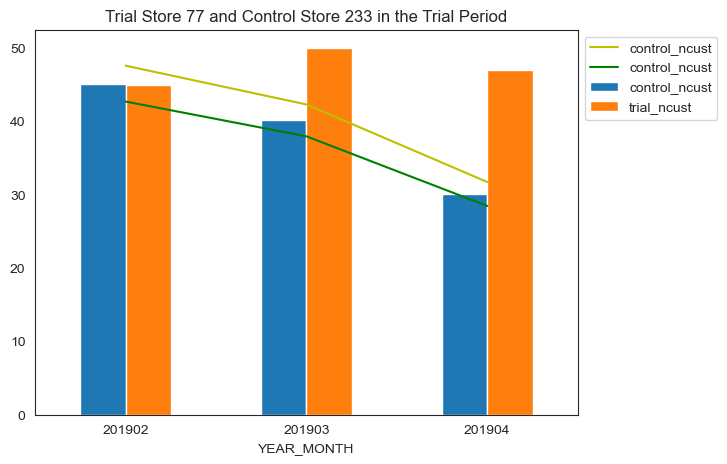

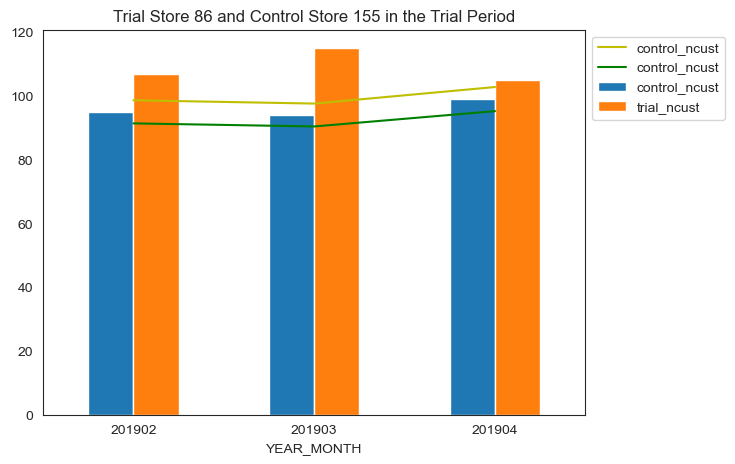

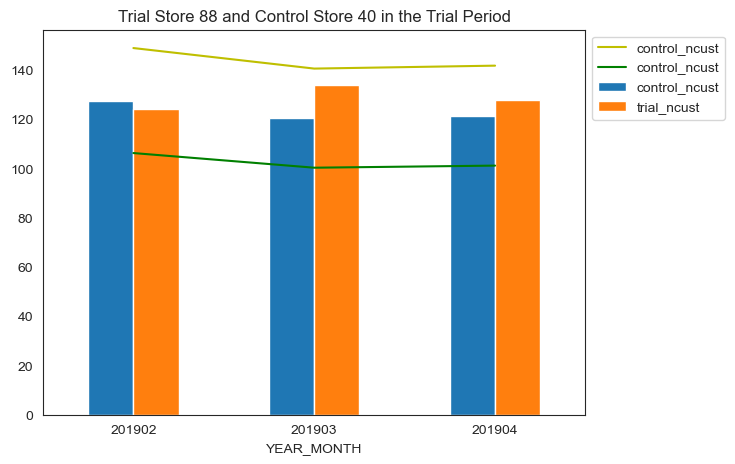

In [557]:
# First do bar charts to focus on the trial period
storepair = [[77, 233], [86, 155], [88, 40]]
for stores in storepair: # stores numbers are stored as [trial, control] in storepair
    trial = stores[0]
    control = stores[1]    
    plot_control = percentdiff[(percentdiff['CONTROL_NBR'] == control) & (percentdiff.YEAR_MONTH >= 201902) & (percentdiff.YEAR_MONTH <= 201904)]\
                    [['YEAR_MONTH', 'CONTROL_NBR', 'scaled_n_cust_c']]
    plot_control = plot_control.rename(columns = {"CONTROL_NBR" : "STORE_NBR", "scaled_n_cust_c": "control_ncust"})
    plot_trial = percentdiff[(percentdiff['TRIAL_NBR'] == trial) & (percentdiff.YEAR_MONTH >= 201902) & (percentdiff.YEAR_MONTH <= 201904)]\
                    [['YEAR_MONTH', 'TRIAL_NBR', 'n_cust_t']]
    plot_trial = plot_trial.rename(columns = {"TRIAL_NBR" : "STORE_NBR", "n_cust_t": "trial_ncust"})
    toplot = plot_control[["YEAR_MONTH", "control_ncust"]].merge(plot_trial[["YEAR_MONTH", "trial_ncust"]],on="YEAR_MONTH").set_index("YEAR_MONTH")
    ax = toplot.plot(kind = 'bar',  figsize=(7, 5))
    

    # plot the thresholds as lines 
    std = percentdiff[(percentdiff['CONTROL_NBR'] == control) & (percentdiff.YEAR_MONTH < 201902)]['cust_percent_diff'].std()
    threshold95 = plot_control.reset_index()[['YEAR_MONTH', 'control_ncust']]
    threshold95.control_ncust = threshold95.control_ncust*(1+std*2)
    threshold5 = plot_control.reset_index()[['YEAR_MONTH', 'control_ncust']]
    threshold5.control_ncust = threshold5.control_ncust*(1-std*2)
    ax95 = threshold95.plot.line(x = 'YEAR_MONTH', y = 'control_ncust',color='y', figsize=(7, 5), use_index=False, ax = ax)
    ax5 = threshold5.plot.line(x = 'YEAR_MONTH', y = 'control_ncust', color='g', figsize=(7, 5), use_index=False, ax = ax)    
    
    # Other plot features
    plt.legend(loc = "upper left",bbox_to_anchor=(1.0, 1.0))
    titlestr = 'Trial Store ' + str(trial) + ' and Control Store ' + str(control) + ' in the Trial Period'
    ax.set_title(titlestr)
    plt.show()

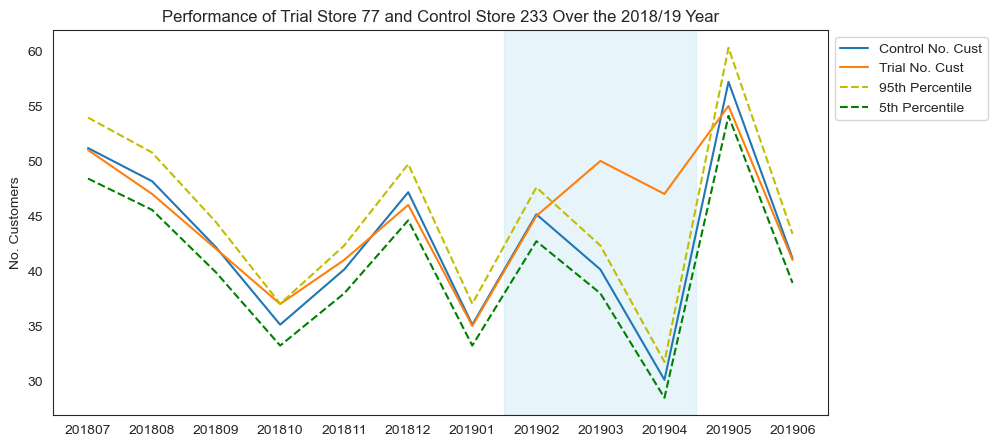

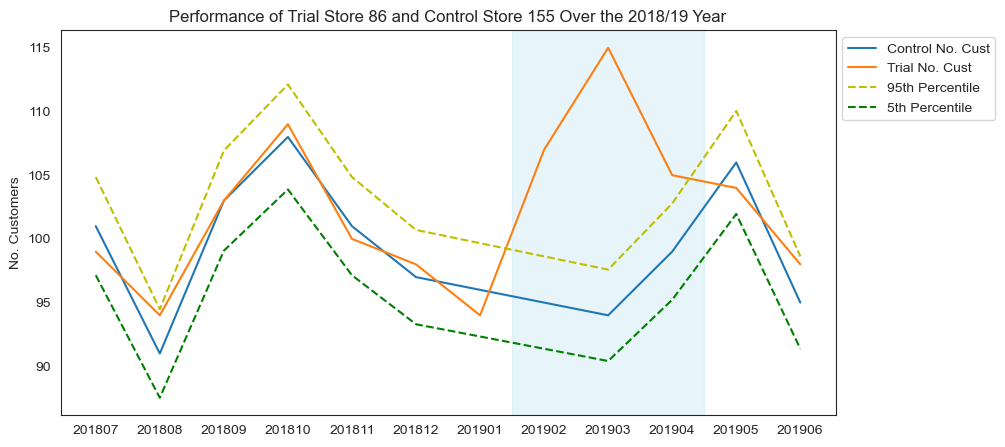

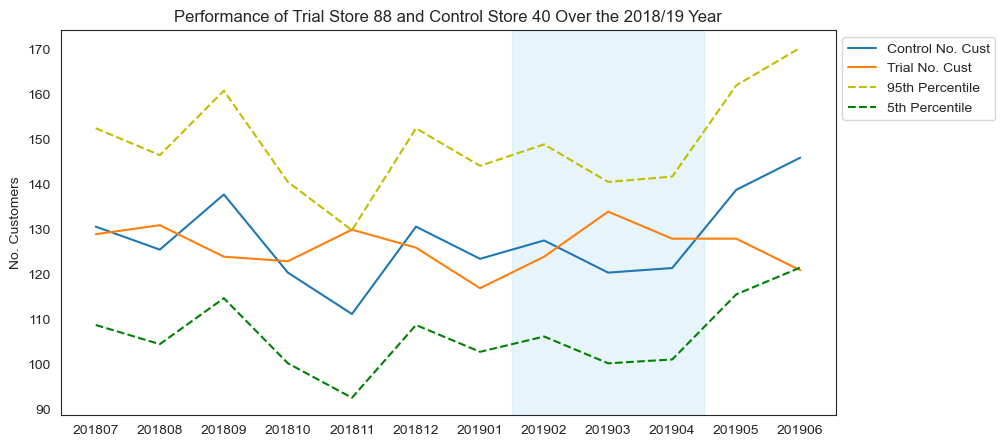

In [560]:
# Then do line graphs to show a full year's trend 
storepair = [[77, 233], [86, 155], [88, 40]]
for stores in storepair: # stores numbers are stored as [trial, control] in storepair
    trial = stores[0]
    control = stores[1]    
    plot_control = percentdiff[(percentdiff['CONTROL_NBR'] == control)]\
                    [['YEAR_MONTH', 'CONTROL_NBR', 'scaled_n_cust_c']]
    plot_control = plot_control.rename(columns = {"CONTROL_NBR" : "STORE_NBR", "scaled_n_cust_c": "control_ncust"})
    plot_trial = percentdiff[(percentdiff['TRIAL_NBR'] == trial)]\
                    [['YEAR_MONTH', 'TRIAL_NBR', 'n_cust_t']]
    plot_trial = plot_trial.rename(columns = {"TRIAL_NBR" : "STORE_NBR", "n_cust_t": "trial_ncust"})
    
    ax = plot_control.plot.line(x = "YEAR_MONTH", y = 'control_ncust', use_index=False, label = 'Control No. Cust')
    ax_trial = plot_trial.plot.line(x = "YEAR_MONTH", y = 'trial_ncust', use_index=False, ax=ax, label = 'Trial No. Cust')
    
    # plot the thresholds as lines 
    std = percentdiff[(percentdiff['CONTROL_NBR'] == control) & (percentdiff.YEAR_MONTH < 201902)]['cust_percent_diff'].std()
    threshold95 = plot_control.reset_index()[['YEAR_MONTH', 'control_ncust']]
    threshold95.control_ncust = threshold95.control_ncust*(1+std*2)
    threshold5 = plot_control.reset_index()[['YEAR_MONTH', 'control_ncust']]
    threshold5.control_ncust = threshold5.control_ncust*(1-std*2)
    ax95 = threshold95.plot.line(x = 'YEAR_MONTH', y = 'control_ncust',color='y', linestyle = '--', figsize=(10, 5), use_index=False, ax = ax, label = '95th Percentile')
    ax5 = threshold5.plot.line(x = 'YEAR_MONTH', y = 'control_ncust', color='g',  linestyle = '--', figsize=(10, 5), use_index=False, ax = ax, label = '5th Percentile')    
    #ax.add_patch(Rectangle((6.5, 0), 3, 2000, alpha = 0.2, label = 'Trial period'))  
    plt.axvspan(xmin=6.5, xmax=9.5, color = 'skyblue', alpha = 0.2)
    # Other plot features
    ax.set_ylabel('No. Customers')
    plt.legend(loc = "upper left",bbox_to_anchor=(1.0, 1.0))
    titlestr = 'Performance of Trial Store ' + str(trial) + ' and Control Store ' + str(control) + ' Over the 2018/19 Year'
    positions = (0,1,2,3,4,5,6,7,8,9, 10, 11)
    labels = ("201807", '201808', '201809', '201810', '201811', '201812', '201901', '201902', '201903', '201904', '201905', '201906')
    plt.xticks (positions, labels)
    ax.set_title(titlestr)
    plt.show()

It looks like the number of customers is significantly higher in all of the three months for store 77 and 86. This seems to suggest that the trial had a significant impact on increasing the number of customers in trial store 86 but as we saw, the statistical significance in the total sales were not as large, compared to store 77. We should check with the Category Manager if there were special deals in the trial store that were may have resulted in lower prices, impacting the results. Likewise to when considering the total sales, there appears to be no significant different in the number of customers between the control and trial stores for store 88 over the trial period.

## 4. conclusion

In this task, We've found control stores 233, 155, 40 for trial stores 77, 86 and 88 respectively.
we found that the results for trial stores 77 and 88 showed a statistically significant difference in at least two stores of the three months of the trial period. However, this was not the case for store 88. We can check to see if the trial was implemented differently in store 86 but even so, we have been able to see that the trial has resulted in a significant increase in sales.